### 0. Prereqs

In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import (
    SequentialFeatureSelector,
)
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.utils.estimator_checks import check_estimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.ticker as ticker
import os
from pathlib import Path
import json

import sys

sys.path.append("scripts")

import utils
import distclassipy as dcpy

cd = dcpy.Distance()

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
np.random.seed(settings_dict["seed_choice"])

classification_letter = "c"
classification_problem = settings_dict["classification_problem"][classification_letter]
classes_to_keep = settings_dict["classes_to_keep"][classification_letter]
results_subfolder = f"{classification_letter}. {classification_problem}"
sns_dict = settings_dict["sns_dict"]

sns.set_theme(**sns_dict)

In [3]:
# Load Data
X_df_FULL = pd.read_csv("data/X_df.csv", index_col=0)
y_df_FULL = pd.read_csv("data/y_df.csv", index_col=0)

In [4]:
# Remove features to be dropped from previous notebook
with open(os.path.join("results", results_subfolder, "drop_features.txt")) as f:
    bad_features = json.load(f)  # manually selected

X_df_FULL = X_df_FULL.drop(bad_features, axis=1)

print(X_df_FULL.shape[1])

31


In [5]:
# Keep only current classes
cl_keep_str = "_".join(classes_to_keep)

y_df = y_df_FULL[y_df_FULL["class"].isin(classes_to_keep)]
X_df = X_df_FULL.loc[y_df.index]
X = X_df.to_numpy()
y = y_df.to_numpy().ravel()

In [6]:
with open(os.path.join("results", results_subfolder, "best_common_features.txt")) as f:
    best_common_features = json.load(f)

In [7]:
all_metrics = [
    "euclidean",
    "braycurtis",
    "canberra",
    "cityblock",
    "chebyshev",
    cd.clark,
    "correlation",
    "cosine",
    cd.hellinger,
    cd.jaccard,
    cd.lorentzian,
    cd.marylandbridge,
    cd.meehl,
    cd.motyka,
    cd.soergel,
    cd.wave_hedges,
    cd.kulczynski,
    cd.add_chisq,
]

Metric:   0%|          | 0/18 [00:00<?, ?it/s]

******************** Euclidean ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


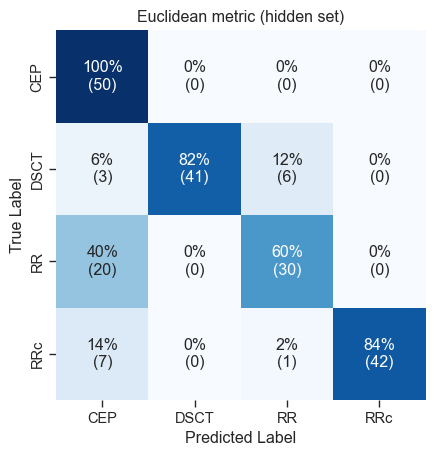

********** Run 2 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


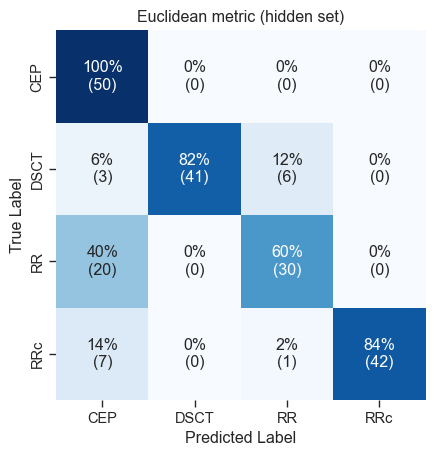

********** Run 3 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


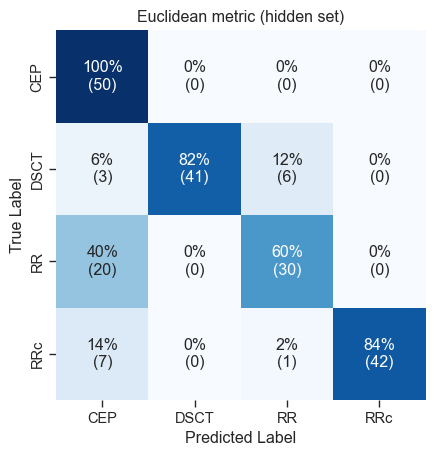

********** Run 4 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


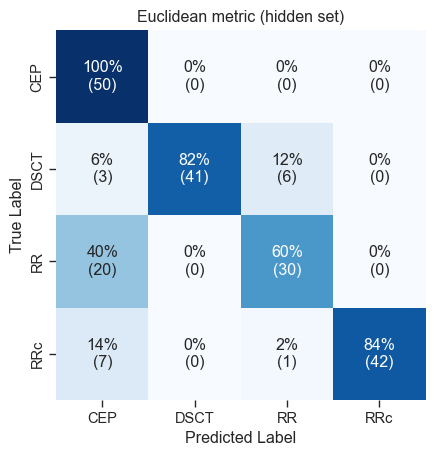

********** Run 5 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


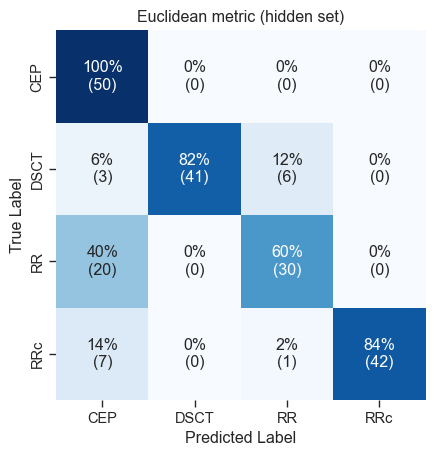

********** Run 6 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


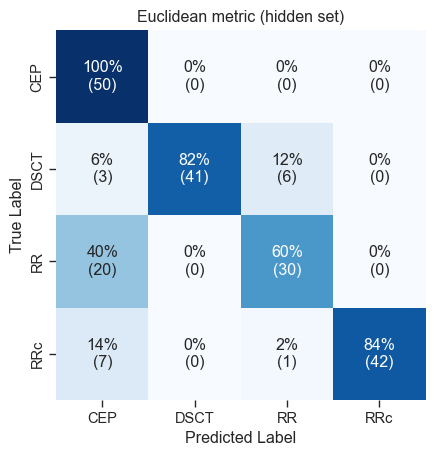

********** Run 7 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


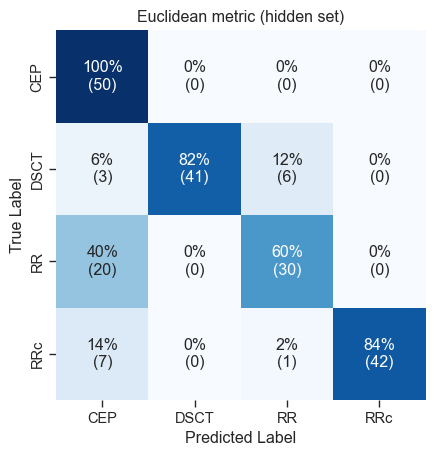

********** Run 8 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


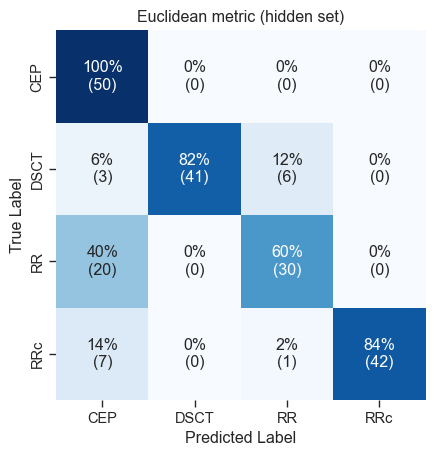

********** Run 9 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


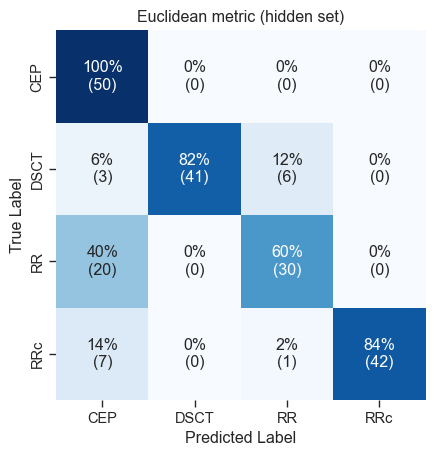

********** Run 10 **********
	Expected Score from training:
		F1 = 80.01 ± 0.51%
	Actual score on hidden set:
		F1 = 81.83 %


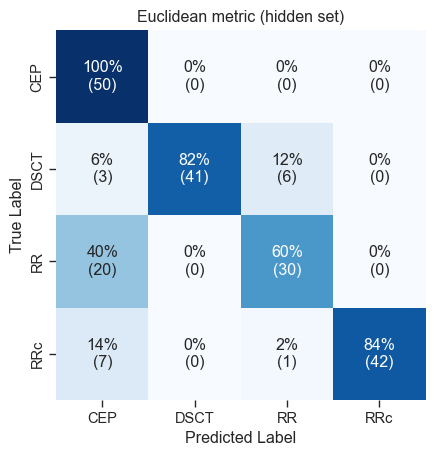

******************** Braycurtis ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


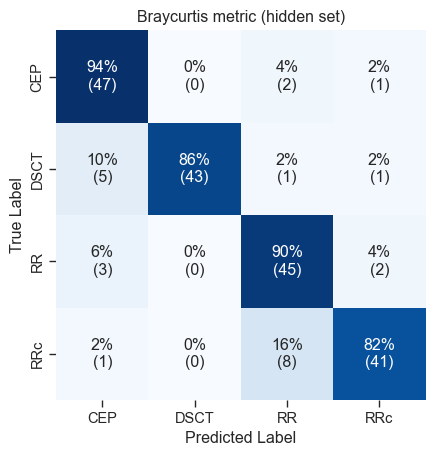

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


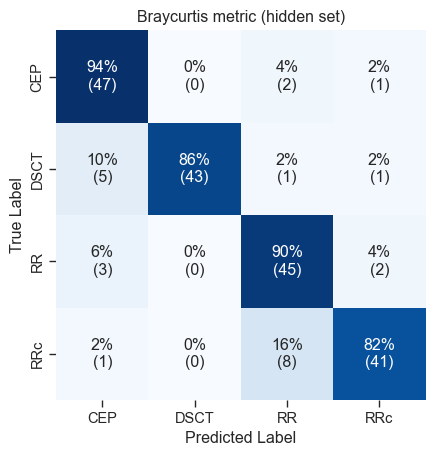

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


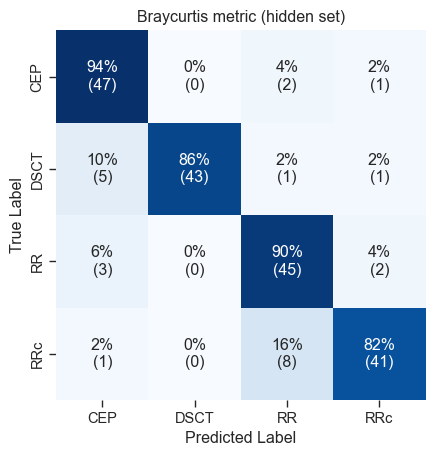

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


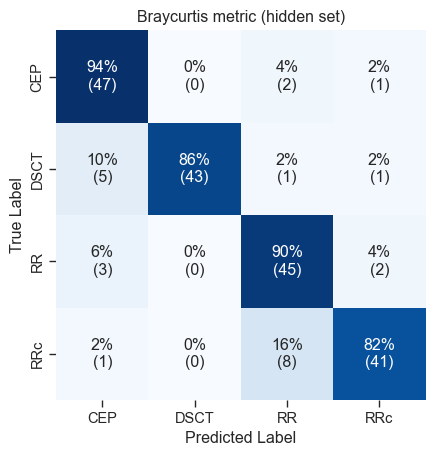

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


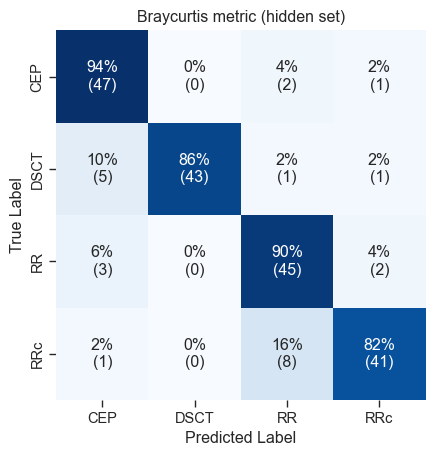

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


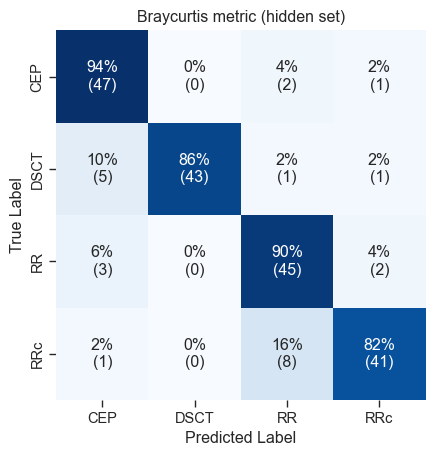

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


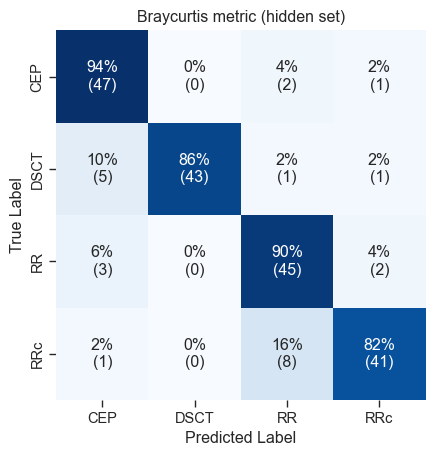

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


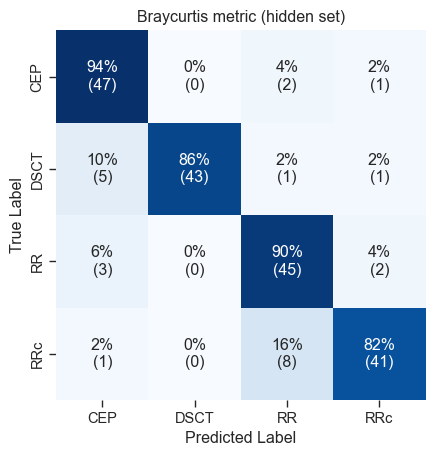

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


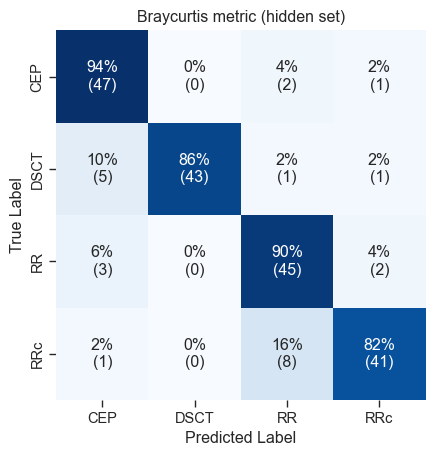

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


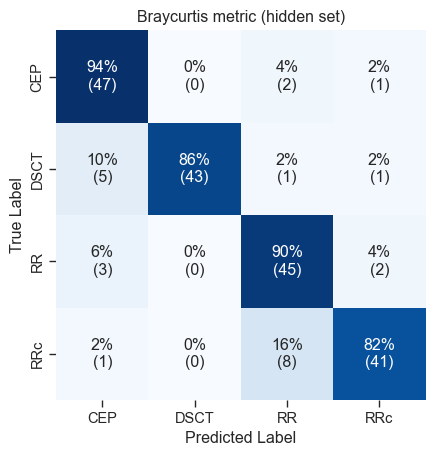

******************** Canberra ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


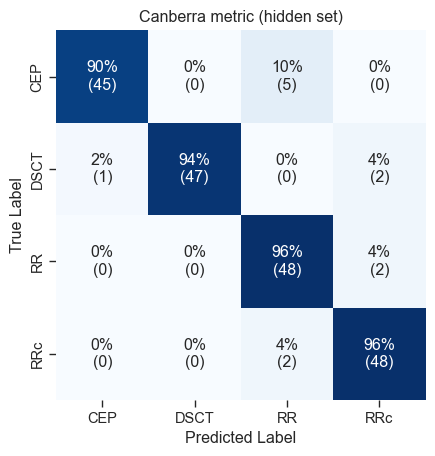

********** Run 2 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


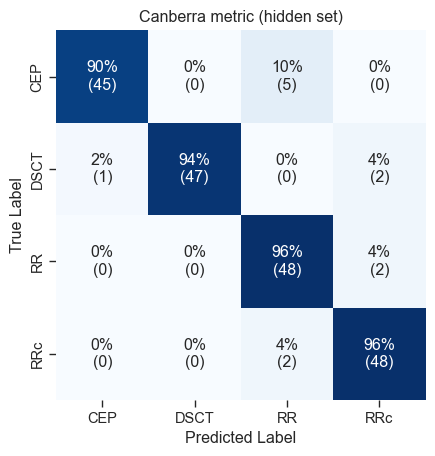

********** Run 3 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


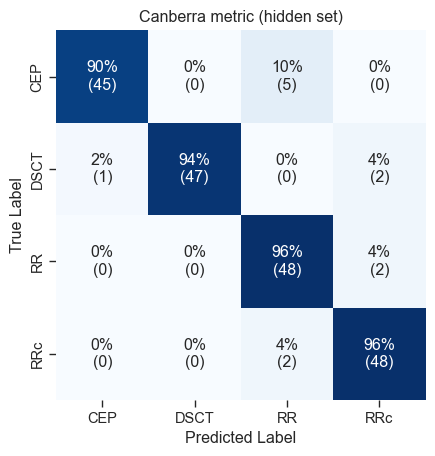

********** Run 4 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


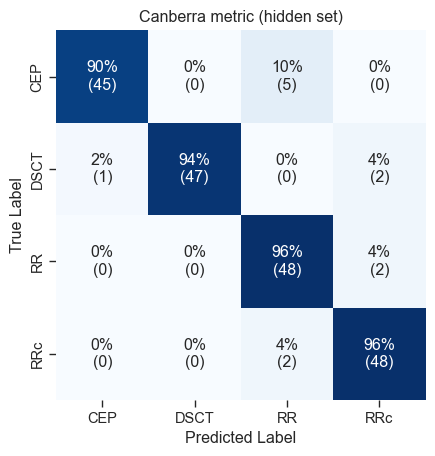

********** Run 5 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


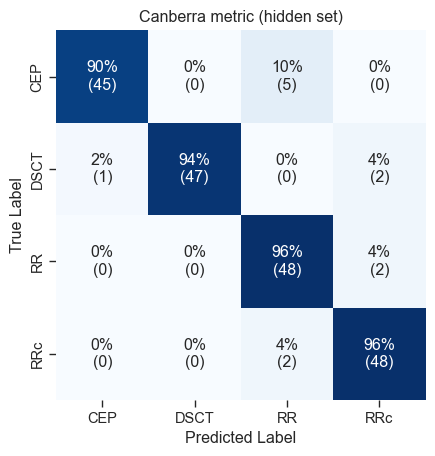

********** Run 6 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


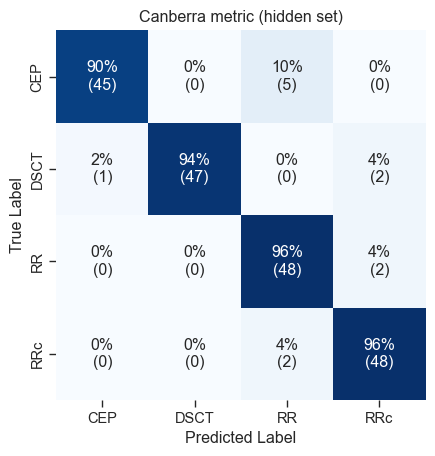

********** Run 7 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


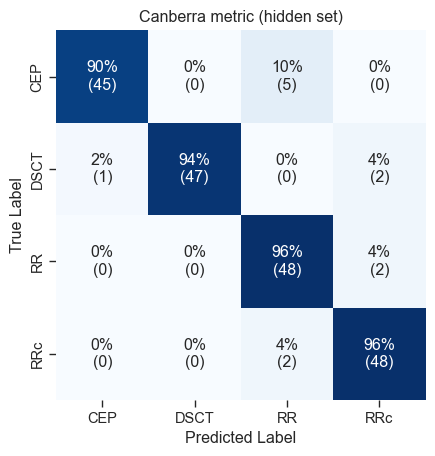

********** Run 8 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


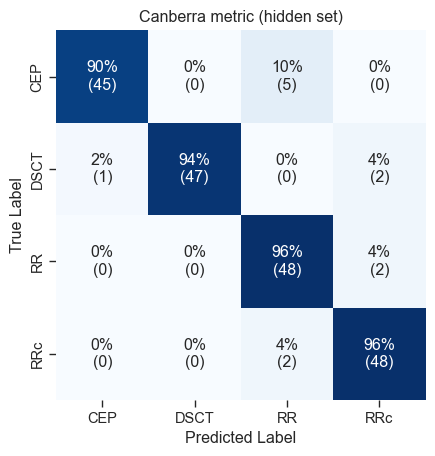

********** Run 9 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


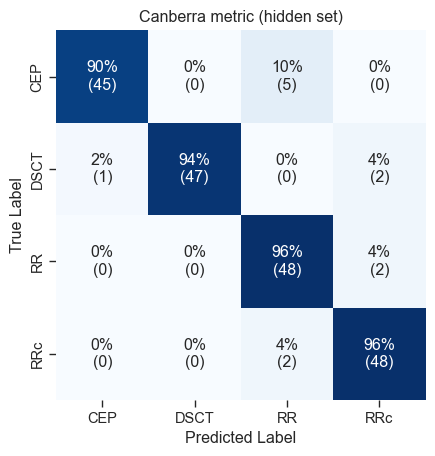

********** Run 10 **********
	Expected Score from training:
		F1 = 91.22 ± 1.38%
	Actual score on hidden set:
		F1 = 94.05 %


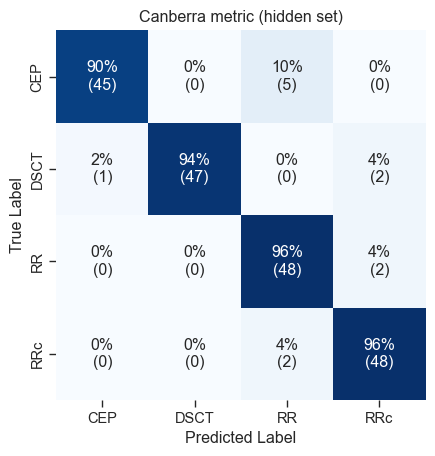

******************** Cityblock ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


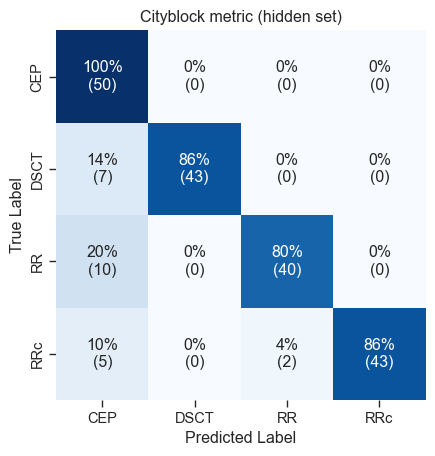

********** Run 2 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


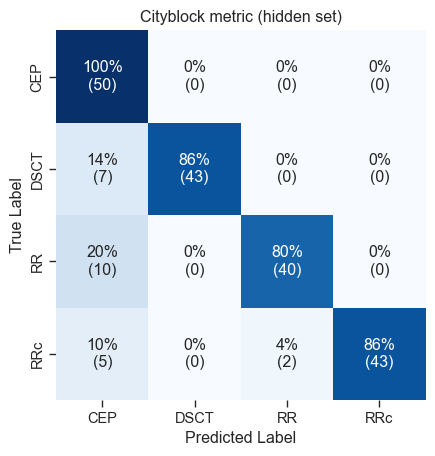

********** Run 3 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


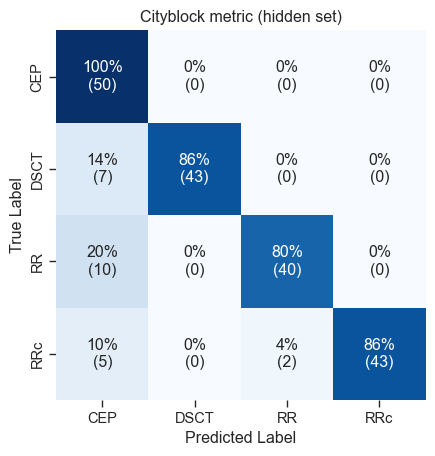

********** Run 4 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


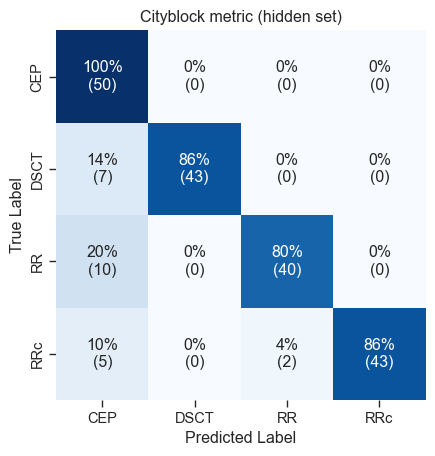

********** Run 5 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


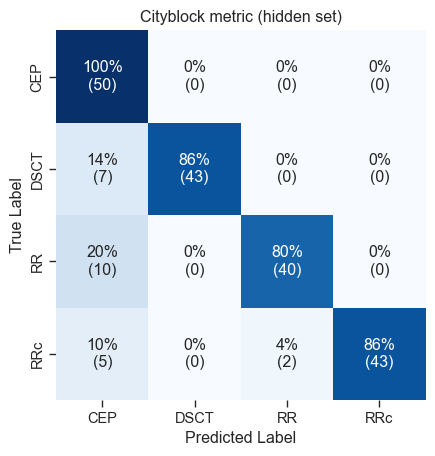

********** Run 6 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


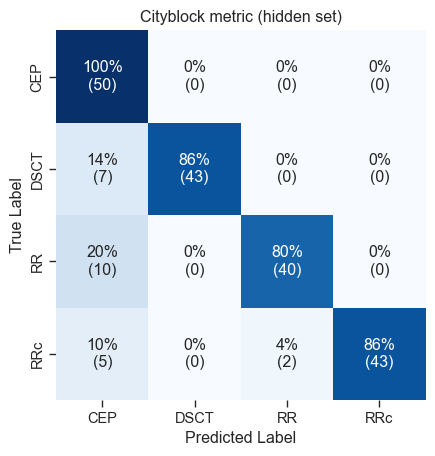

********** Run 7 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


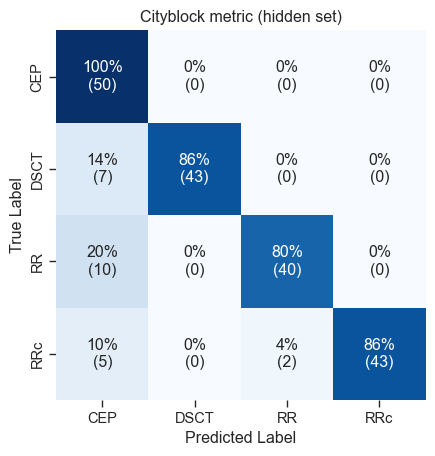

********** Run 8 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


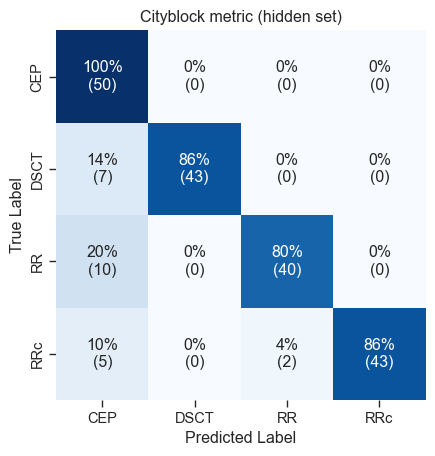

********** Run 9 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


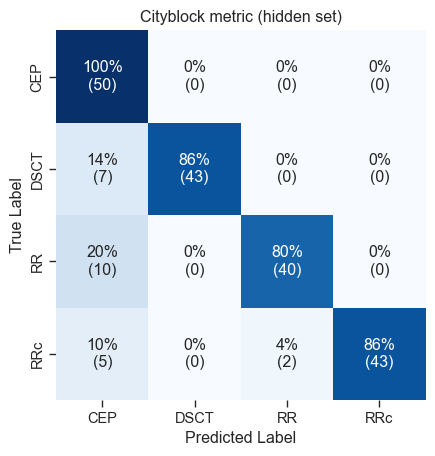

********** Run 10 **********
	Expected Score from training:
		F1 = 84.93 ± 2.92%
	Actual score on hidden set:
		F1 = 88.47 %


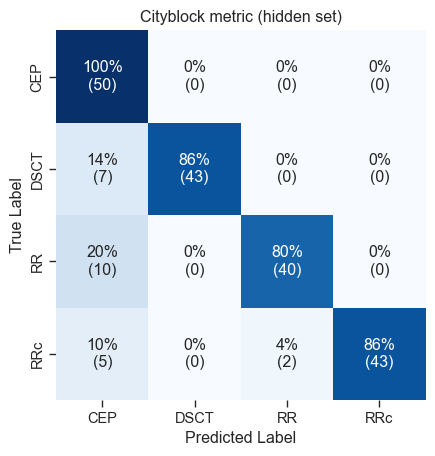

******************** Chebyshev ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


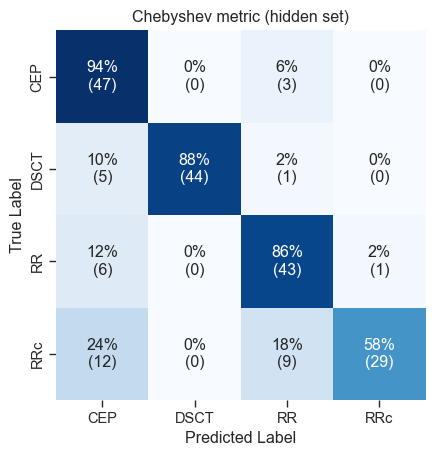

********** Run 2 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


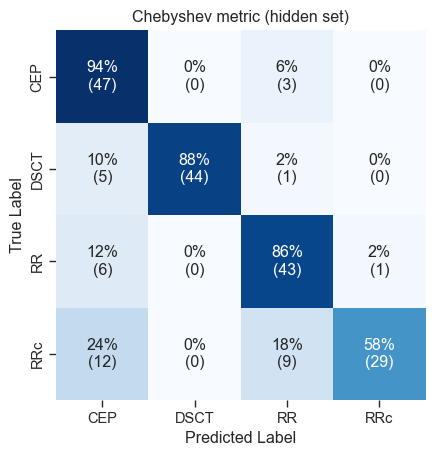

********** Run 3 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


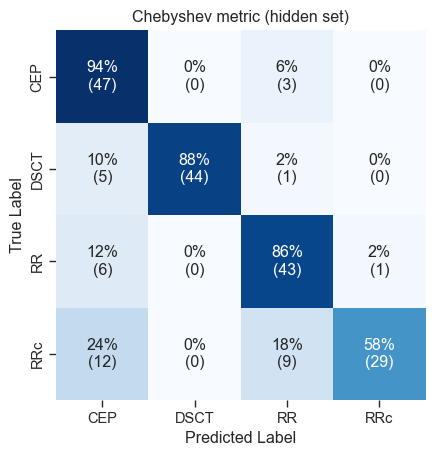

********** Run 4 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


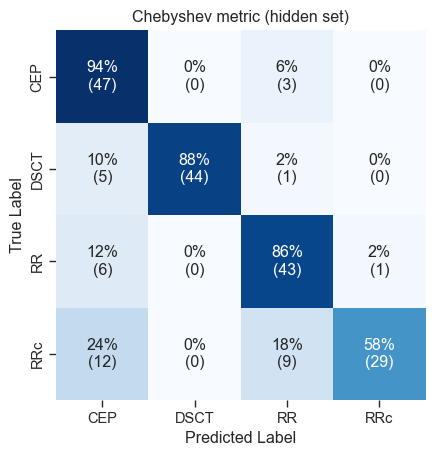

********** Run 5 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


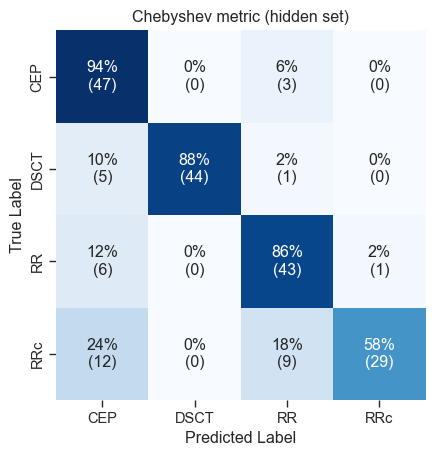

********** Run 6 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


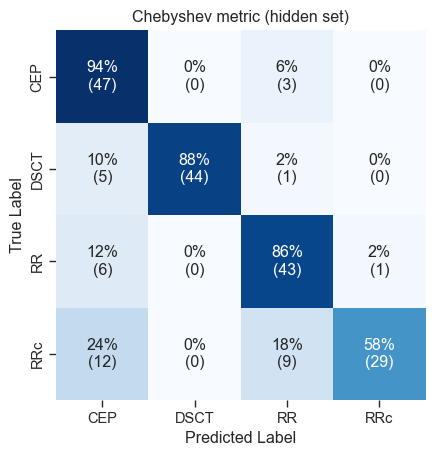

********** Run 7 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


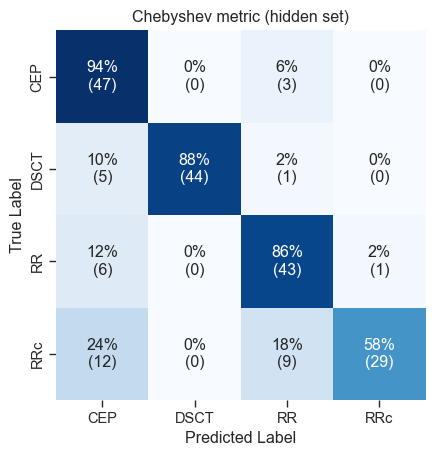

********** Run 8 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


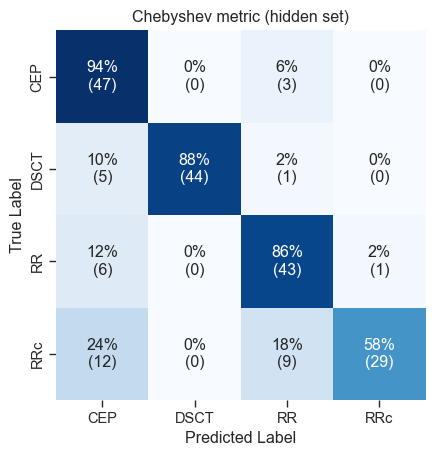

********** Run 9 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


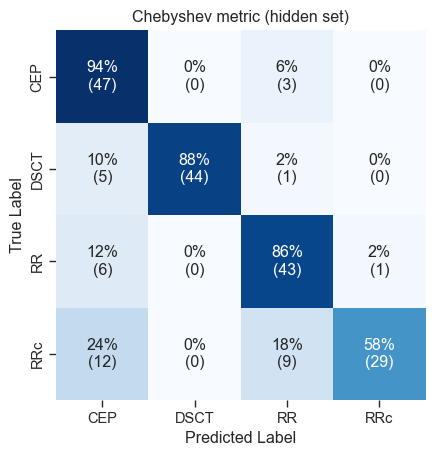

********** Run 10 **********
	Expected Score from training:
		F1 = 76.42 ± 1.70%
	Actual score on hidden set:
		F1 = 81.40 %


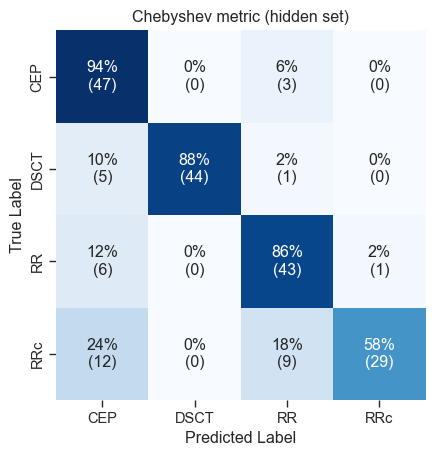

******************** Clark ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


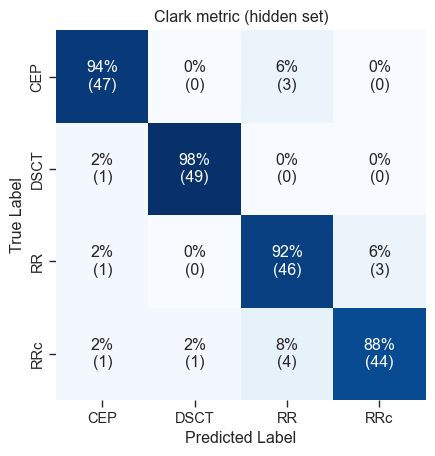

********** Run 2 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


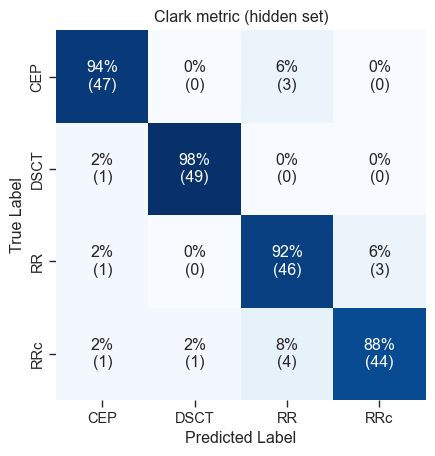

********** Run 3 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


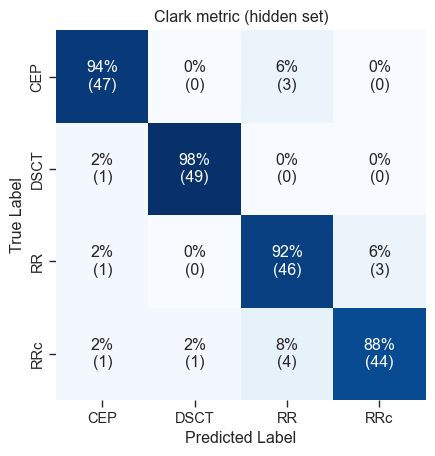

********** Run 4 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


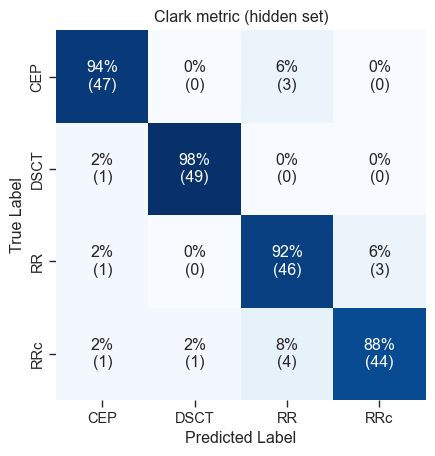

********** Run 5 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


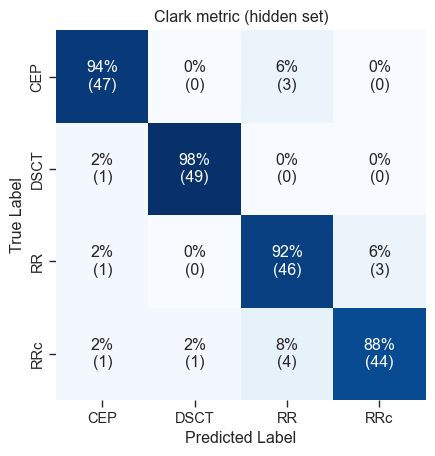

********** Run 6 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


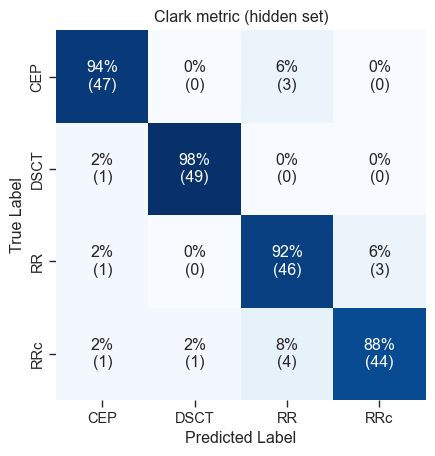

********** Run 7 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


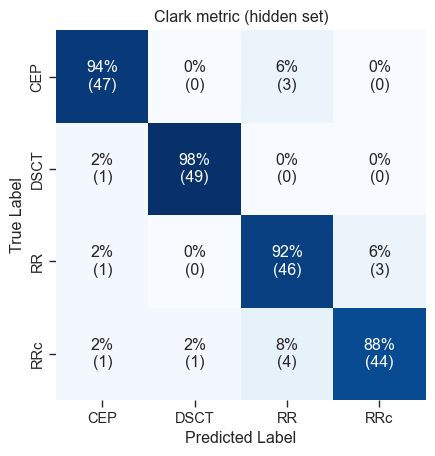

********** Run 8 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


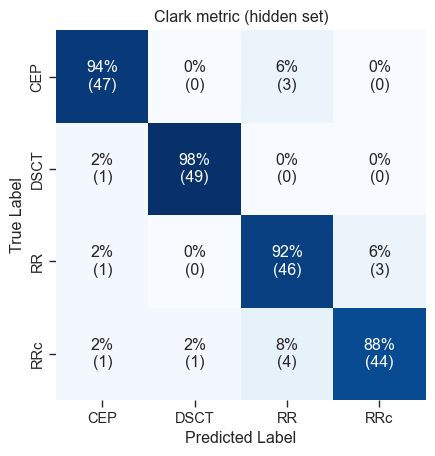

********** Run 9 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


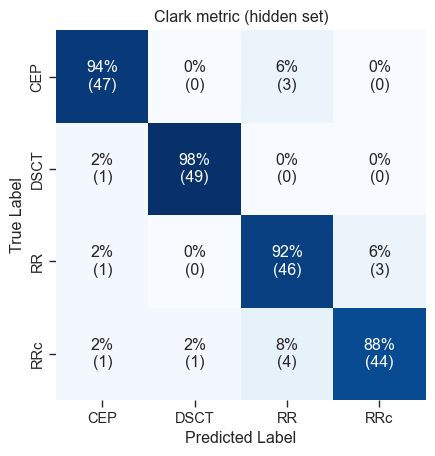

********** Run 10 **********
	Expected Score from training:
		F1 = 91.99 ± 0.61%
	Actual score on hidden set:
		F1 = 93.01 %


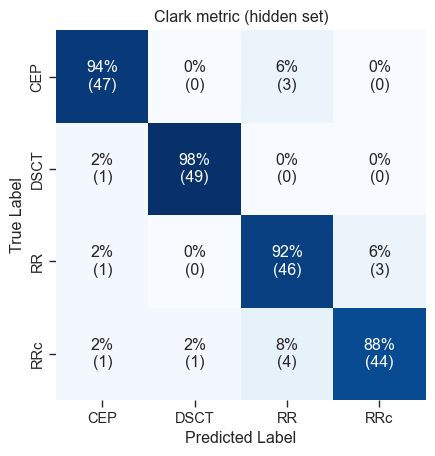

******************** Correlation ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


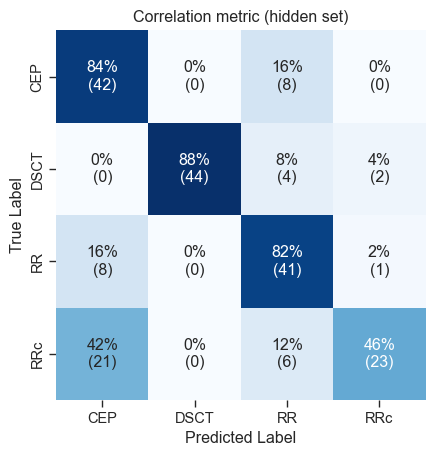

********** Run 2 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


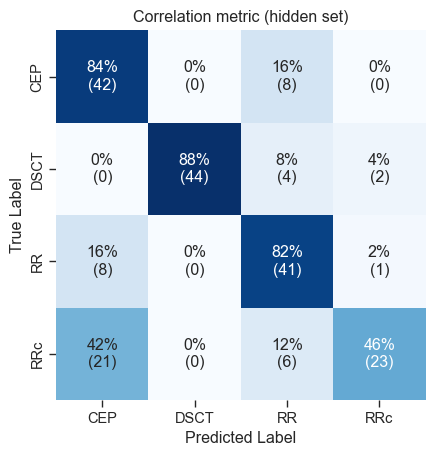

********** Run 3 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


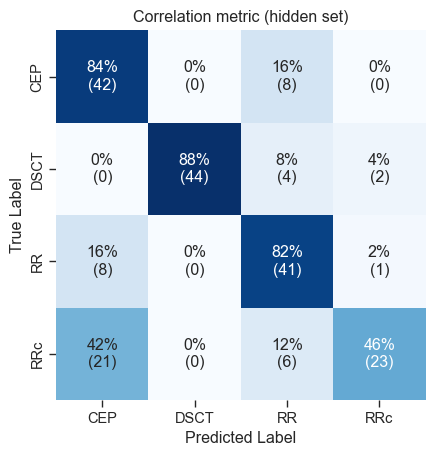

********** Run 4 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


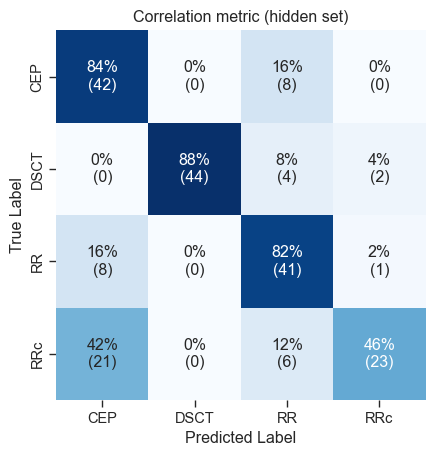

********** Run 5 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


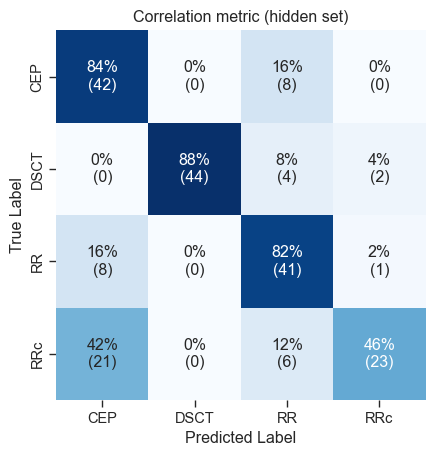

********** Run 6 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


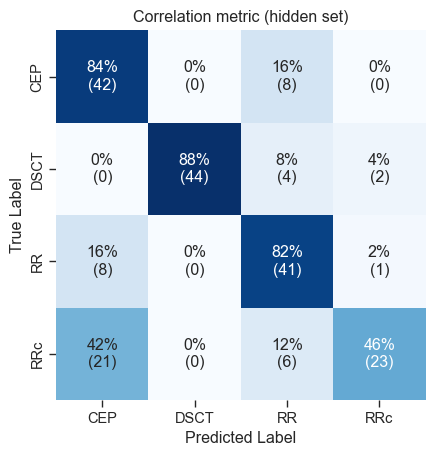

********** Run 7 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


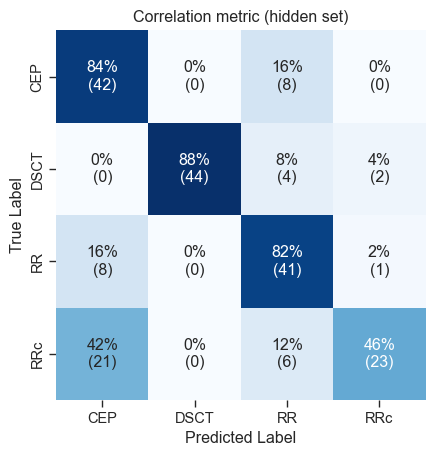

********** Run 8 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


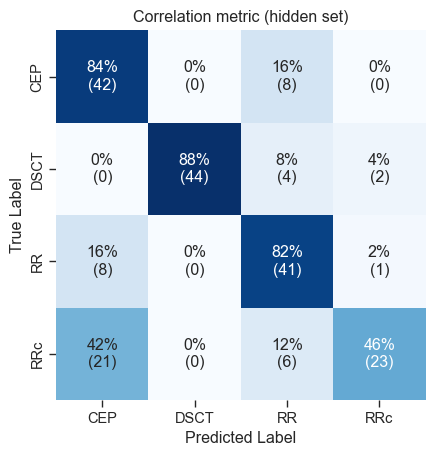

********** Run 9 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


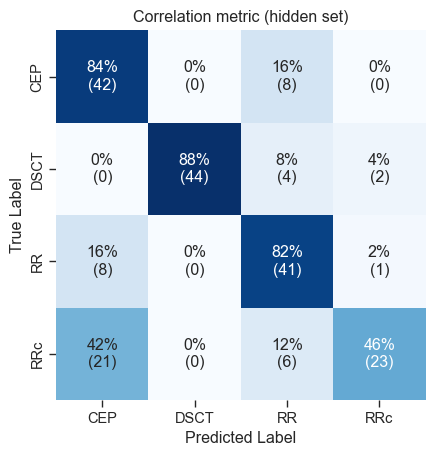

********** Run 10 **********
	Expected Score from training:
		F1 = 80.97 ± 1.70%
	Actual score on hidden set:
		F1 = 74.70 %


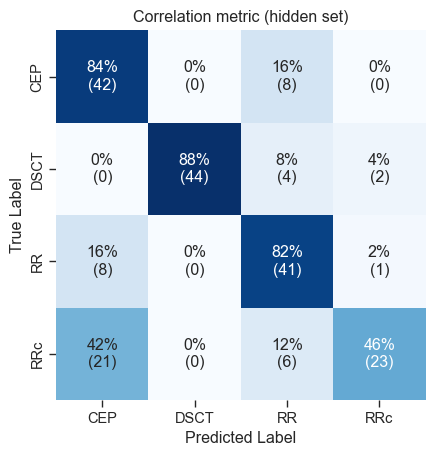

******************** Cosine ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


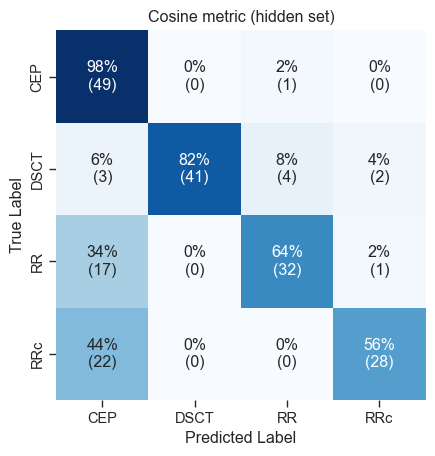

********** Run 2 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


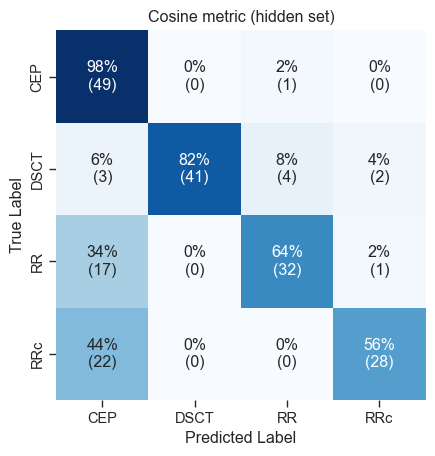

********** Run 3 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


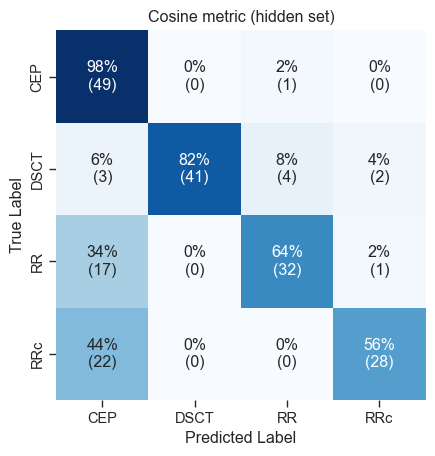

********** Run 4 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


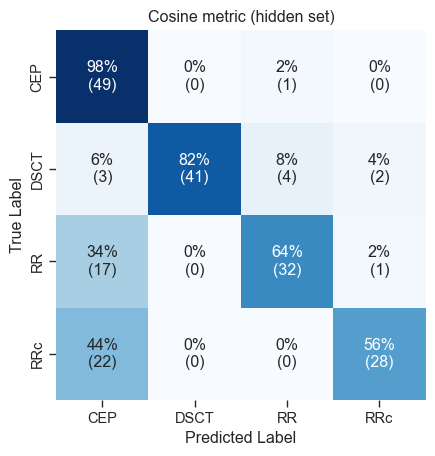

********** Run 5 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


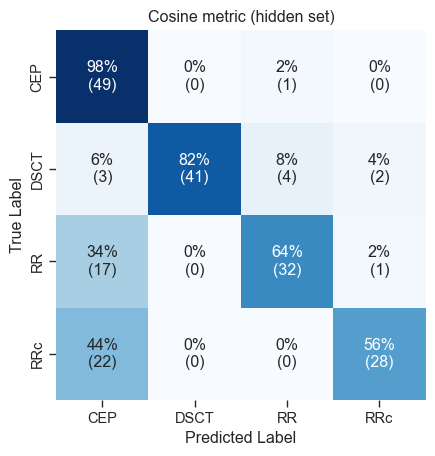

********** Run 6 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


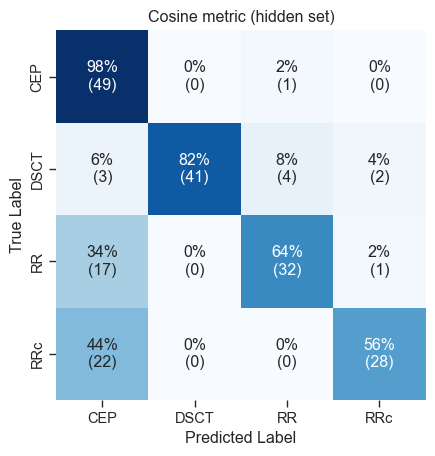

********** Run 7 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


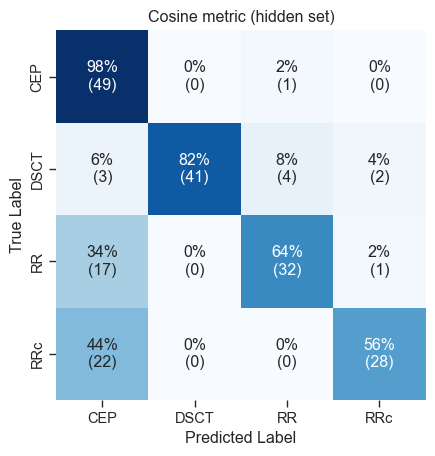

********** Run 8 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


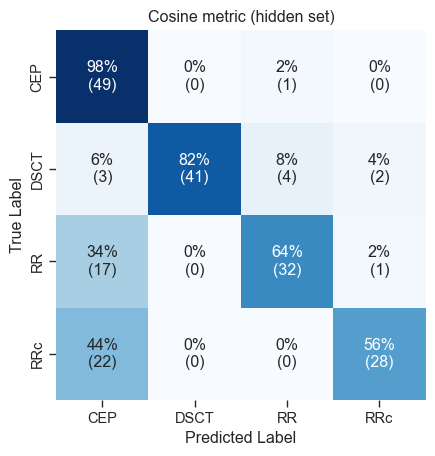

********** Run 9 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


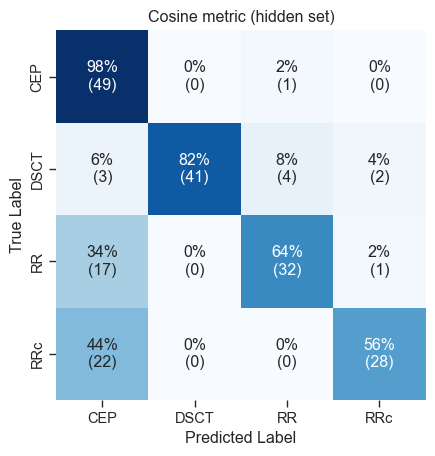

********** Run 10 **********
	Expected Score from training:
		F1 = 84.02 ± 1.47%
	Actual score on hidden set:
		F1 = 75.58 %


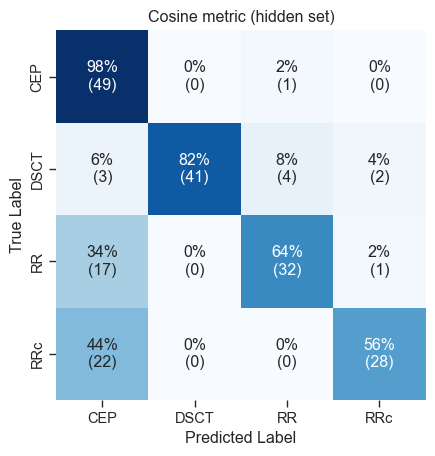

******************** Hellinger ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


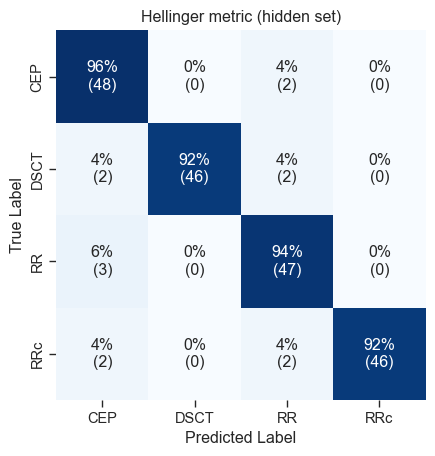

********** Run 2 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


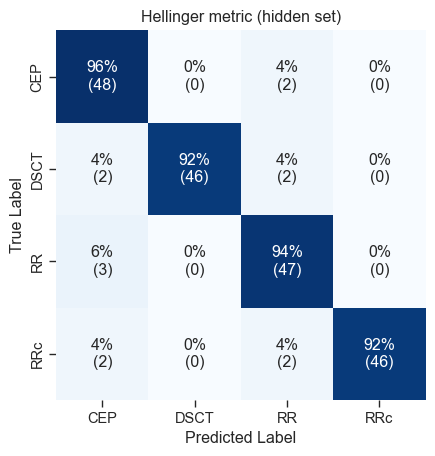

********** Run 3 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


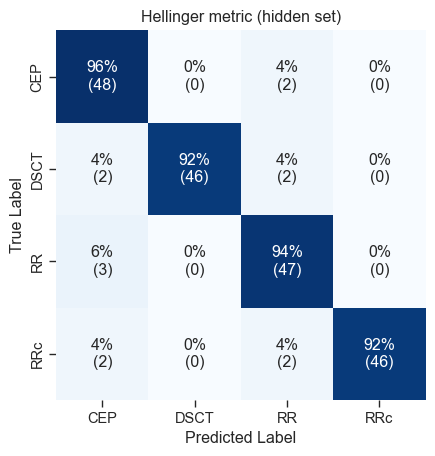

********** Run 4 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


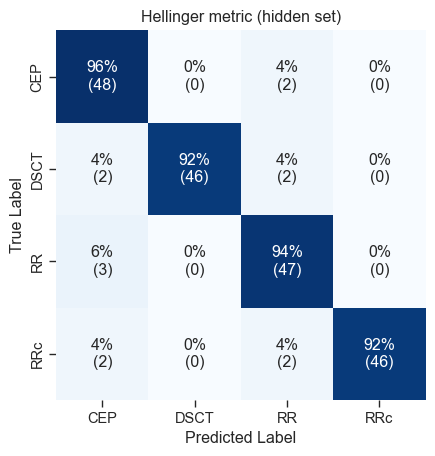

********** Run 5 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


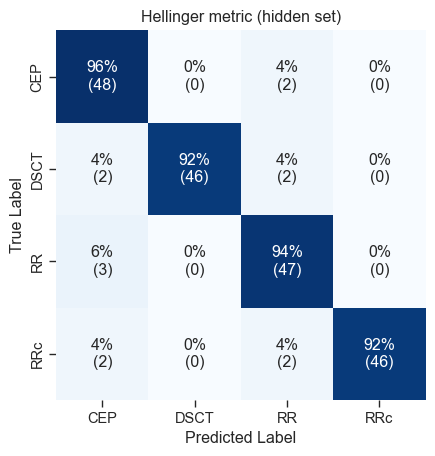

********** Run 6 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


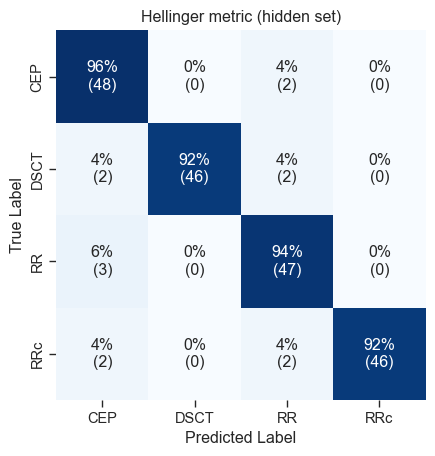

********** Run 7 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


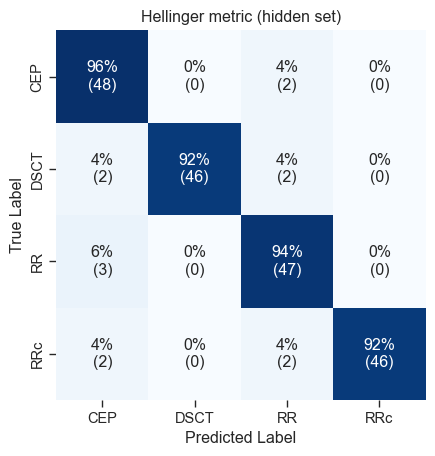

********** Run 8 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


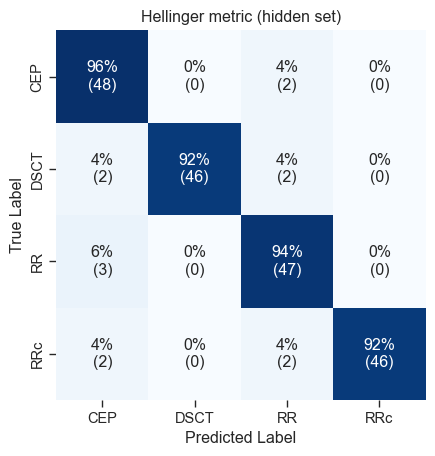

********** Run 9 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


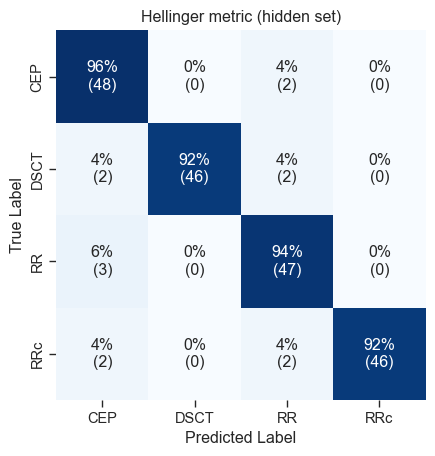

********** Run 10 **********
	Expected Score from training:
		F1 = 91.80 ± 0.71%
	Actual score on hidden set:
		F1 = 93.59 %


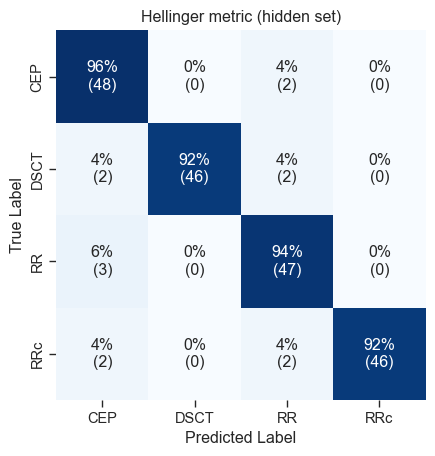

******************** Jaccard ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


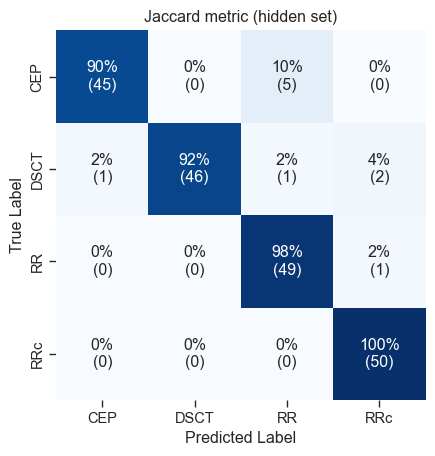

********** Run 2 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


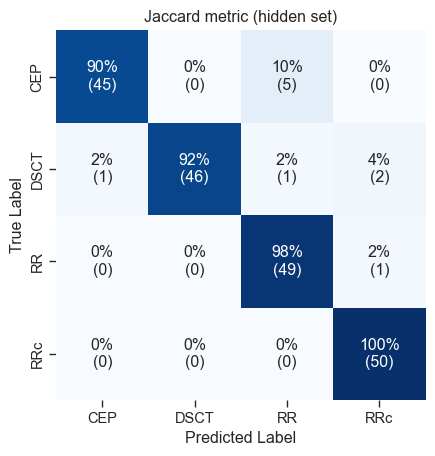

********** Run 3 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


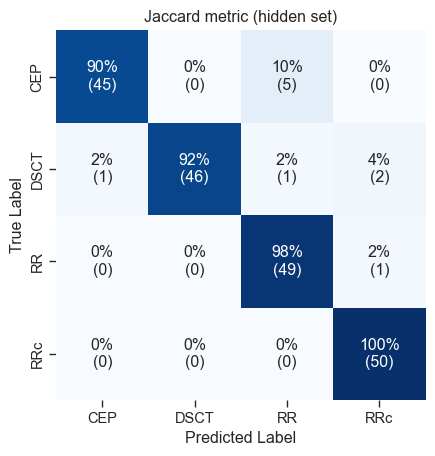

********** Run 4 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


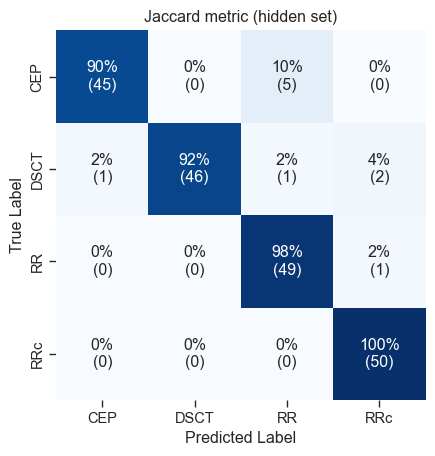

********** Run 5 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


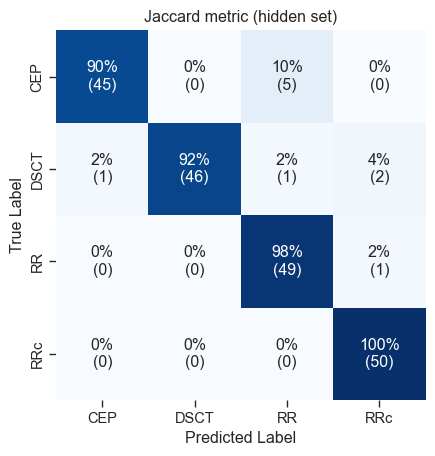

********** Run 6 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


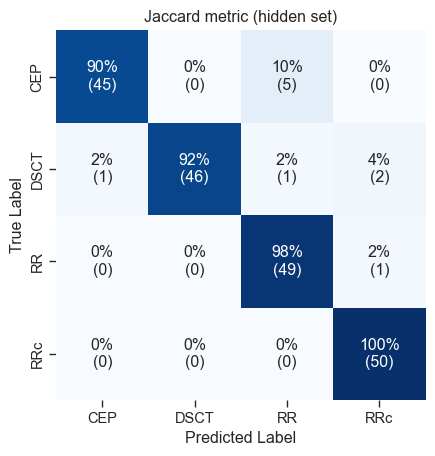

********** Run 7 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


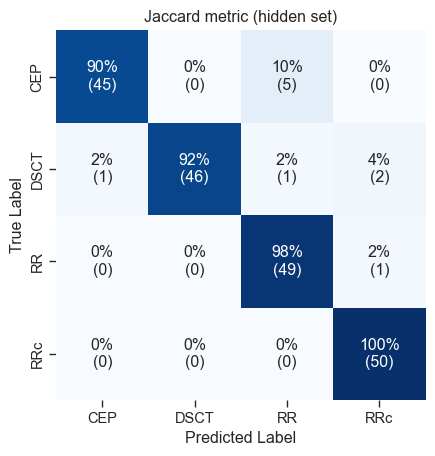

********** Run 8 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


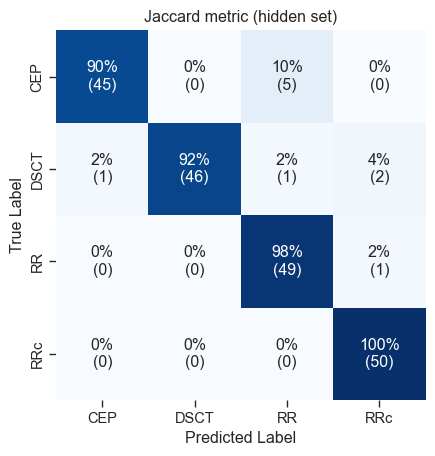

********** Run 9 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


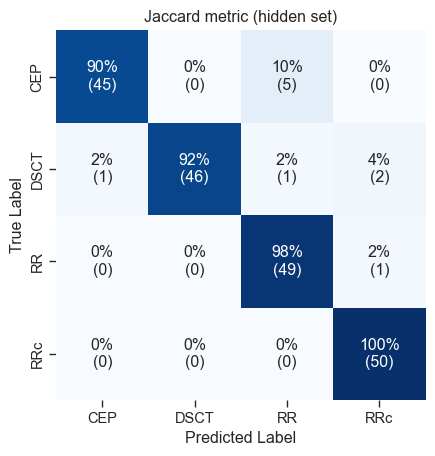

********** Run 10 **********
	Expected Score from training:
		F1 = 88.97 ± 1.65%
	Actual score on hidden set:
		F1 = 95.00 %


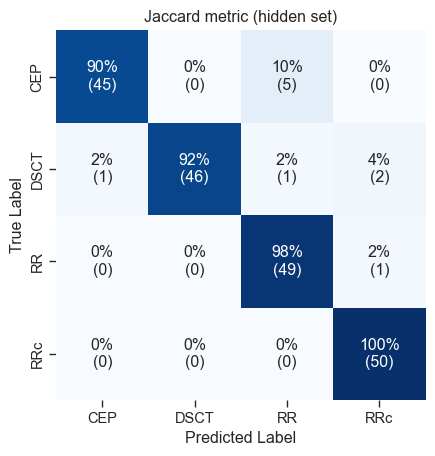

******************** Lorentzian ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


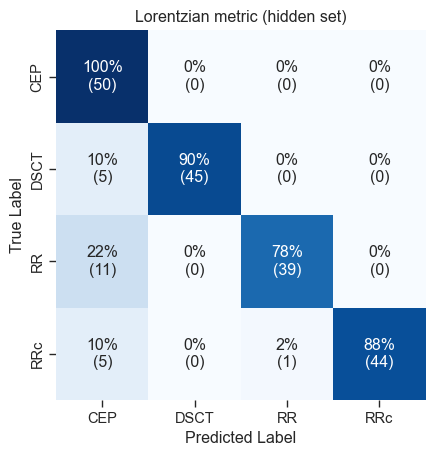

********** Run 2 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


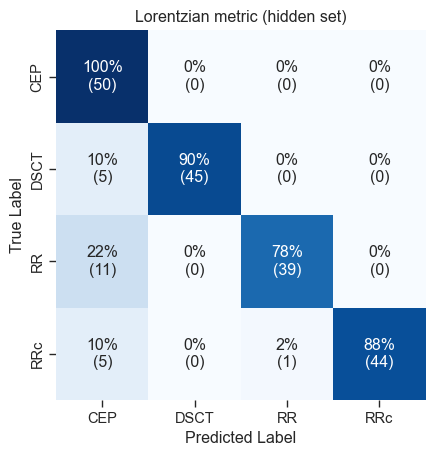

********** Run 3 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


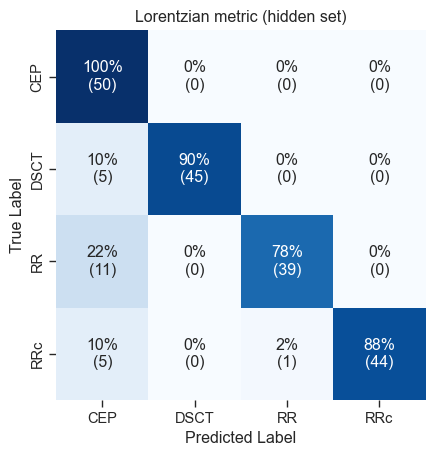

********** Run 4 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


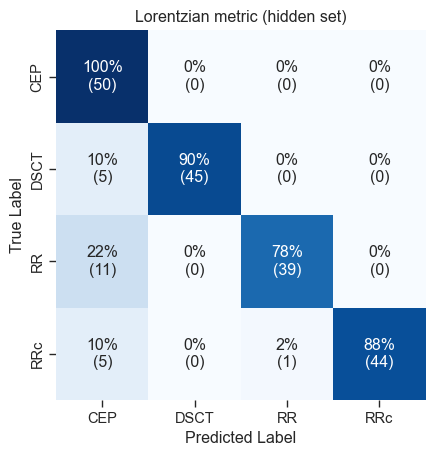

********** Run 5 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


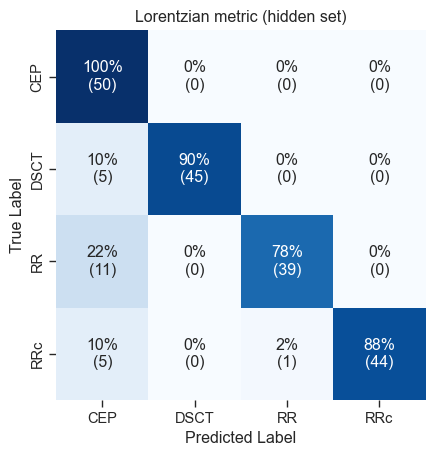

********** Run 6 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


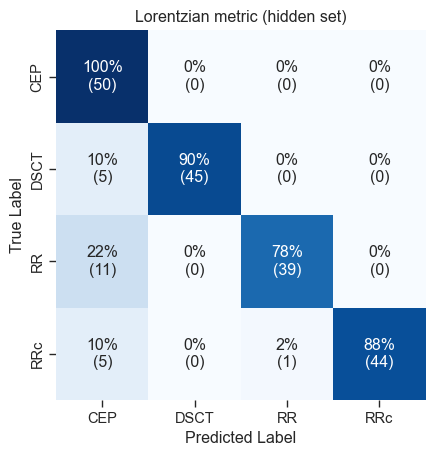

********** Run 7 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


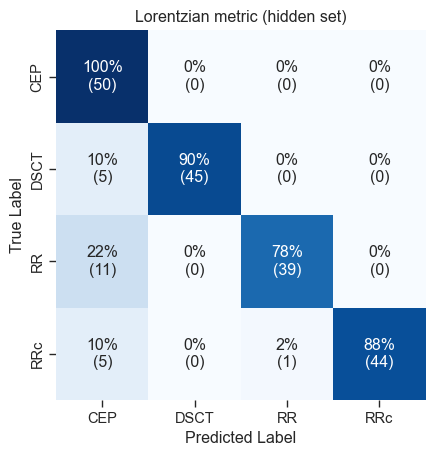

********** Run 8 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


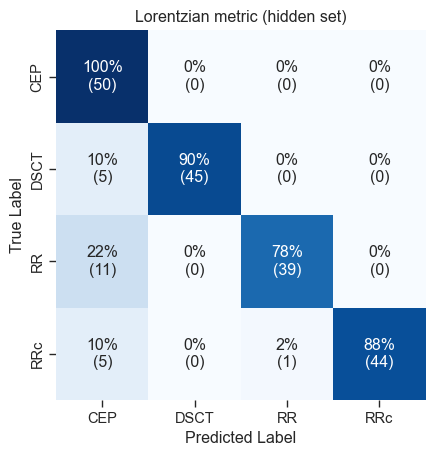

********** Run 9 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


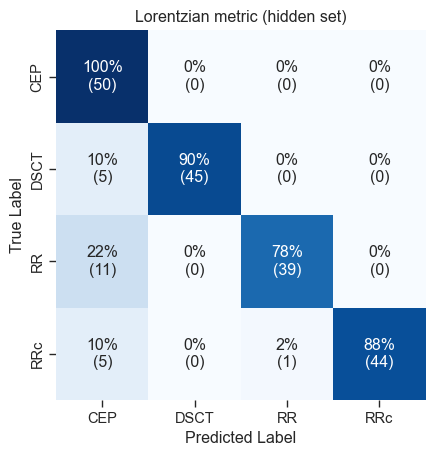

********** Run 10 **********
	Expected Score from training:
		F1 = 86.82 ± 1.89%
	Actual score on hidden set:
		F1 = 89.42 %


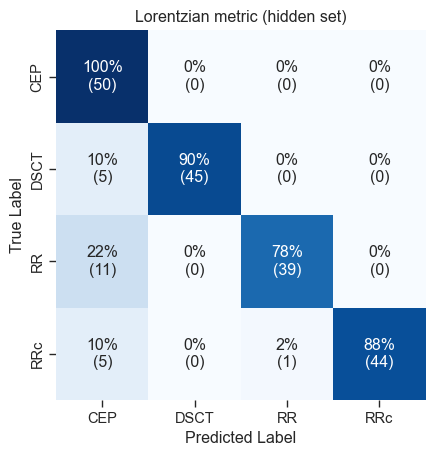

******************** Marylandbridge ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


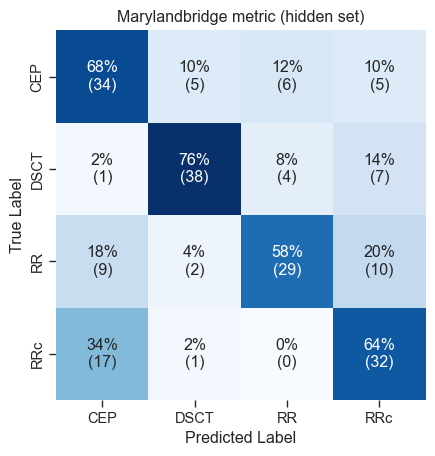

********** Run 2 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


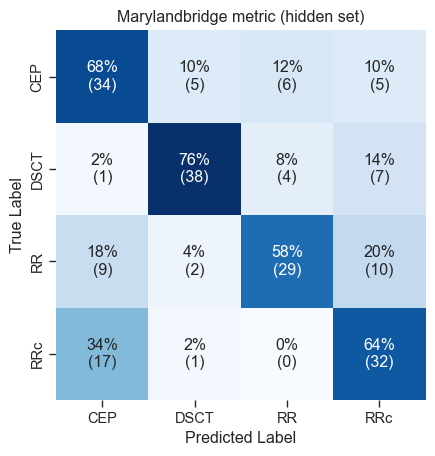

********** Run 3 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


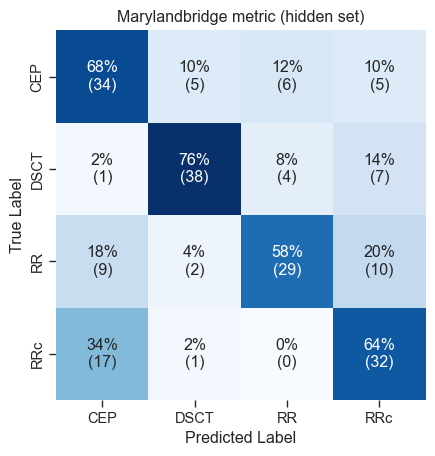

********** Run 4 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


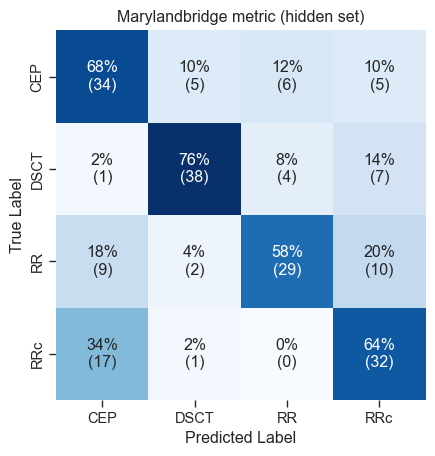

********** Run 5 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


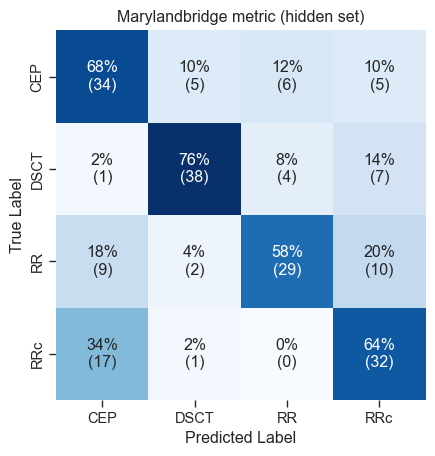

********** Run 6 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


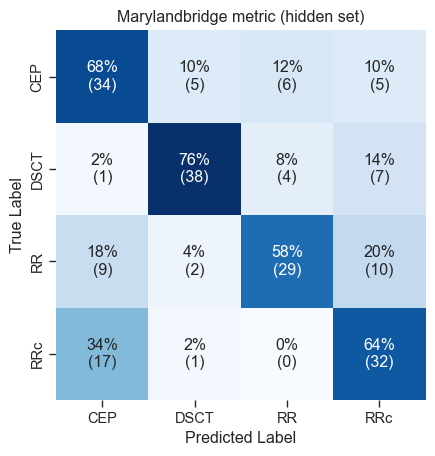

********** Run 7 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


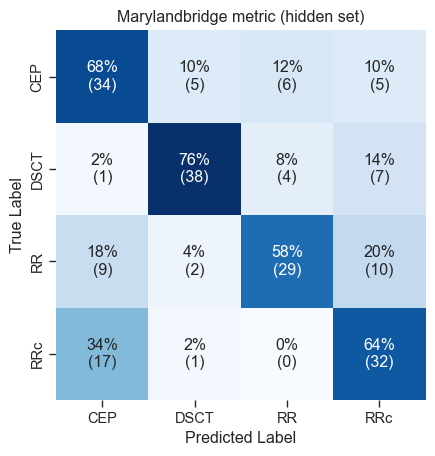

********** Run 8 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


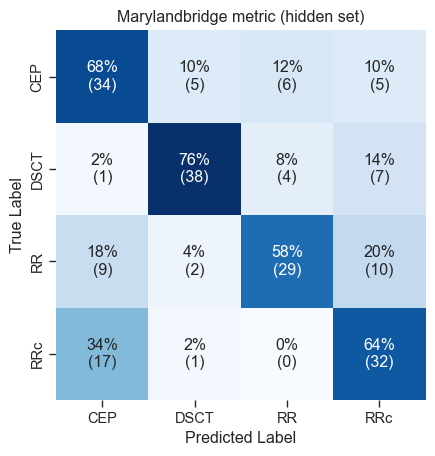

********** Run 9 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


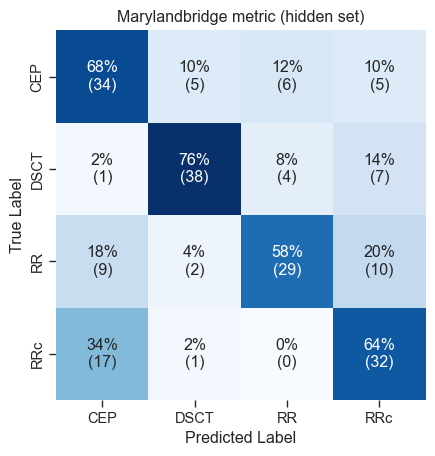

********** Run 10 **********
	Expected Score from training:
		F1 = 74.66 ± 3.18%
	Actual score on hidden set:
		F1 = 66.78 %


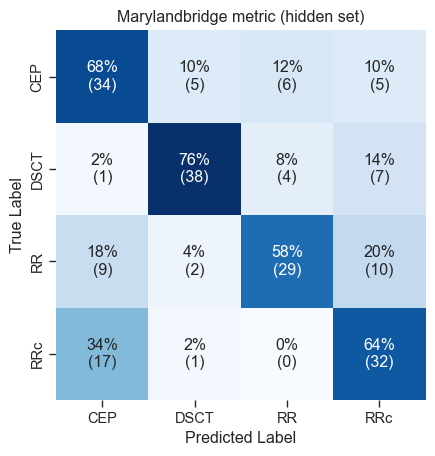

******************** Meehl ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


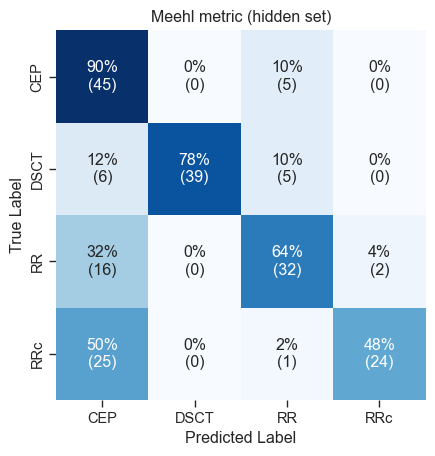

********** Run 2 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


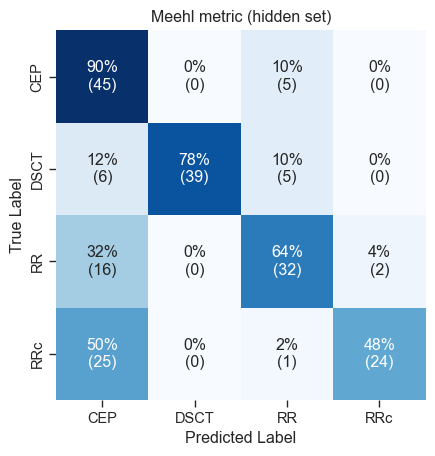

********** Run 3 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


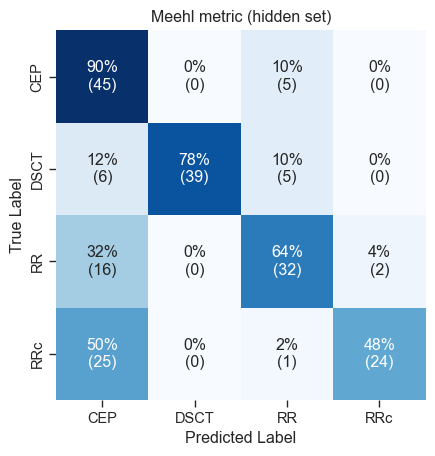

********** Run 4 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


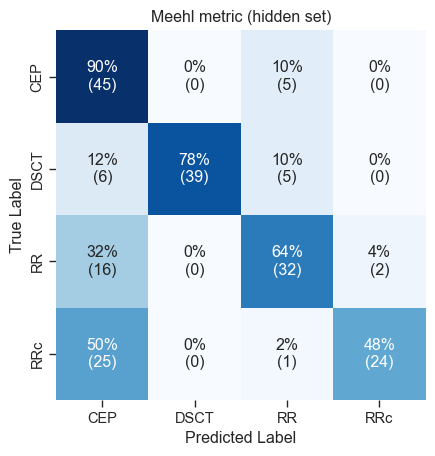

********** Run 5 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


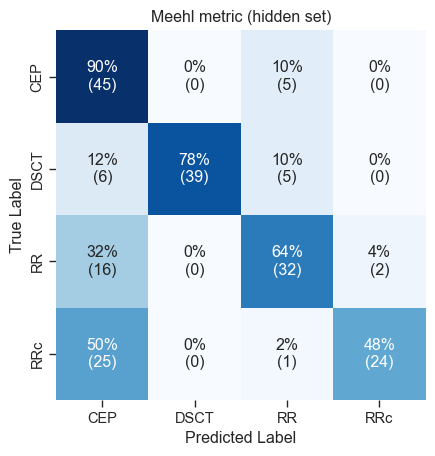

********** Run 6 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


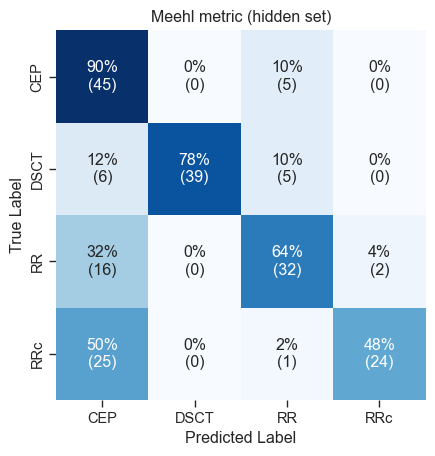

********** Run 7 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


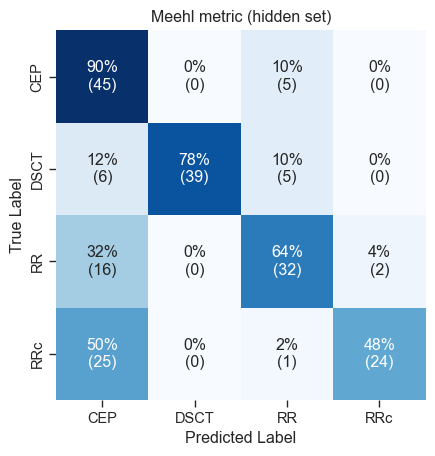

********** Run 8 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


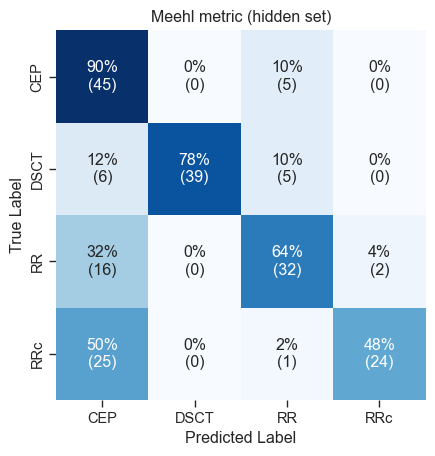

********** Run 9 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


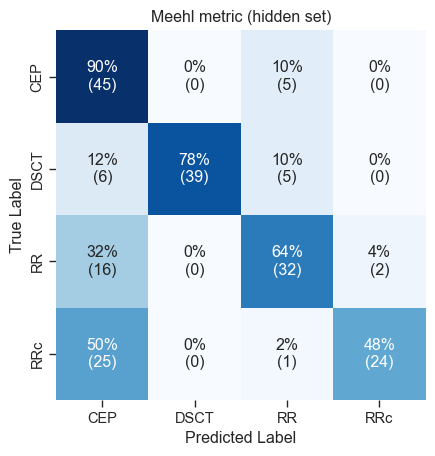

********** Run 10 **********
	Expected Score from training:
		F1 = 79.68 ± 1.52%
	Actual score on hidden set:
		F1 = 70.75 %


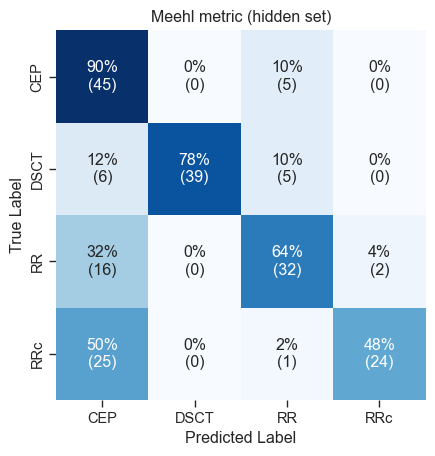

******************** Motyka ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


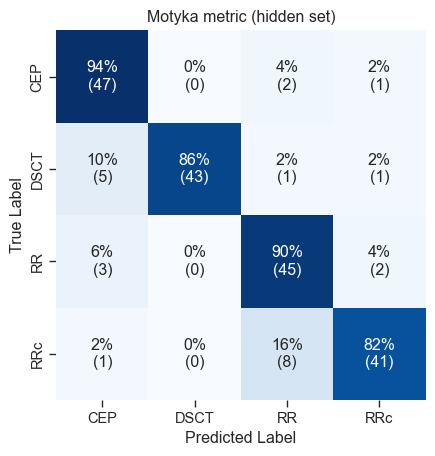

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


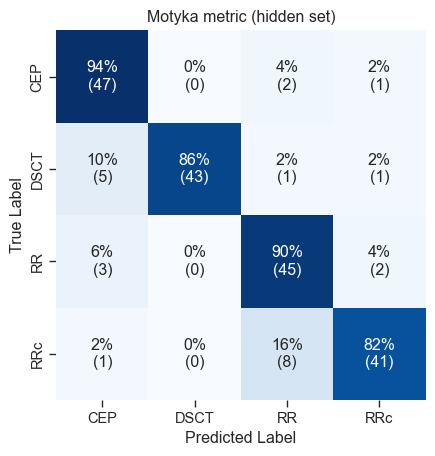

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


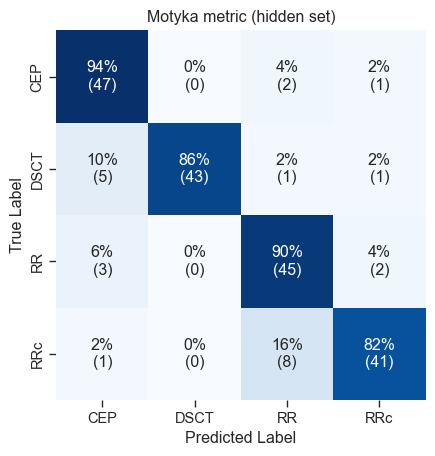

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


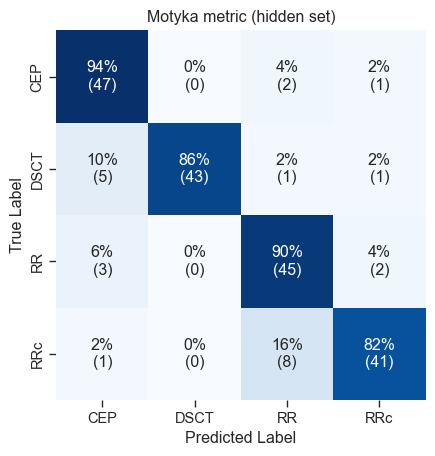

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


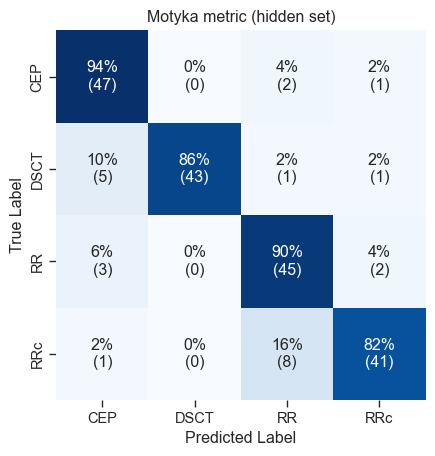

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


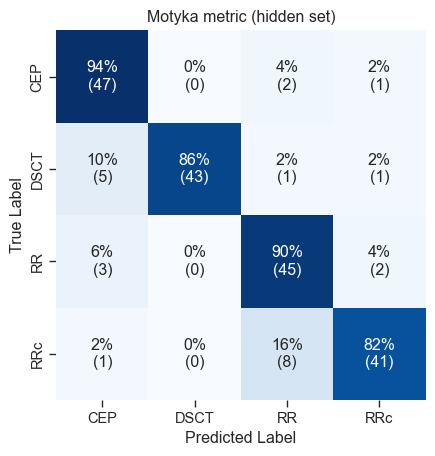

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


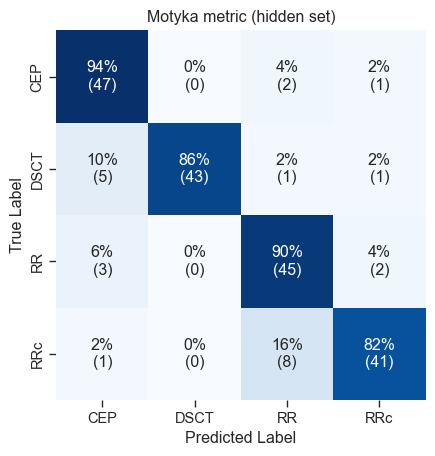

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


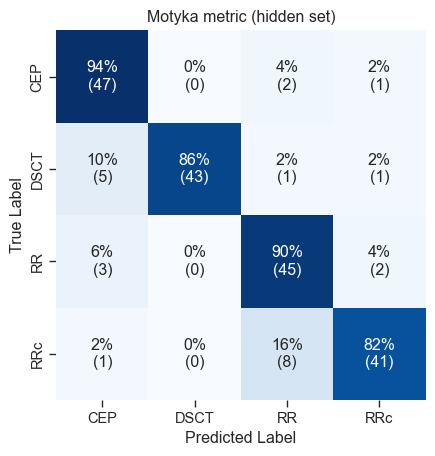

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


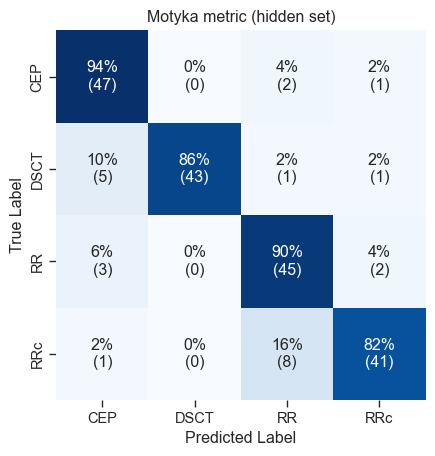

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


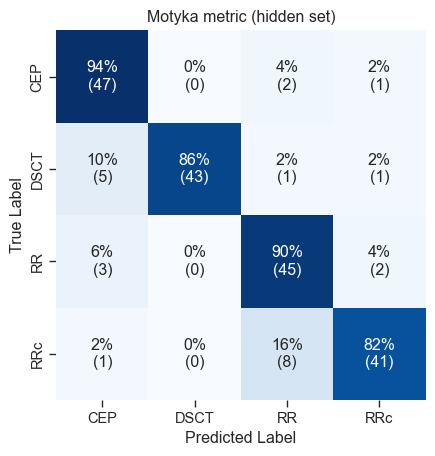

******************** Soergel ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


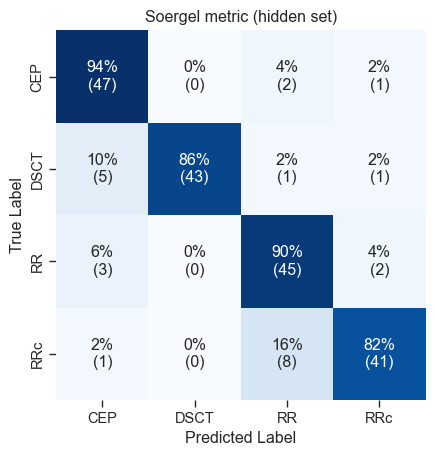

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


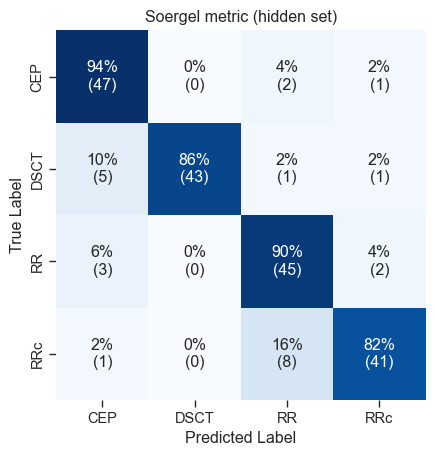

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


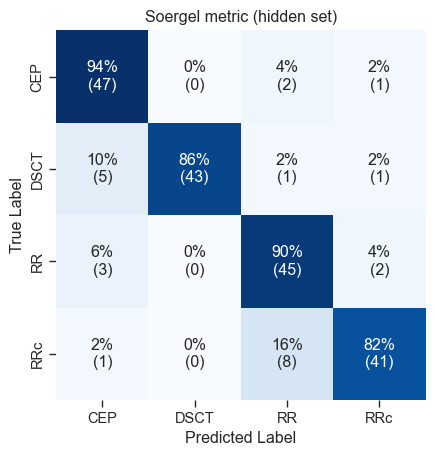

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


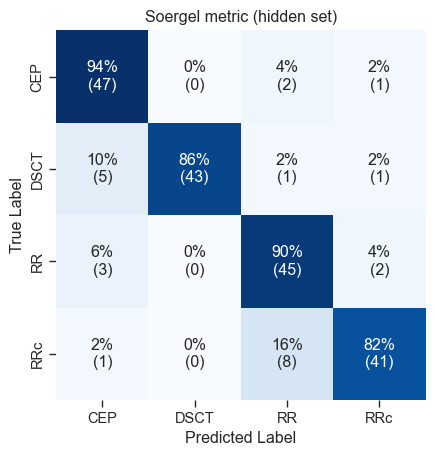

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


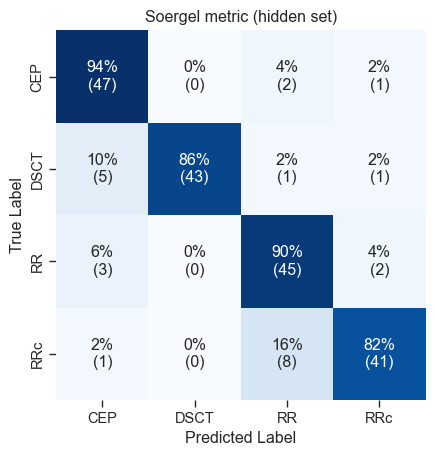

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


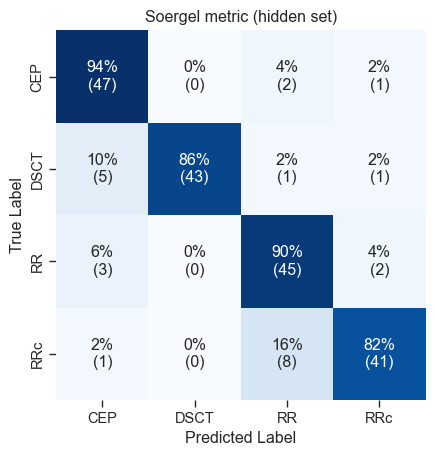

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


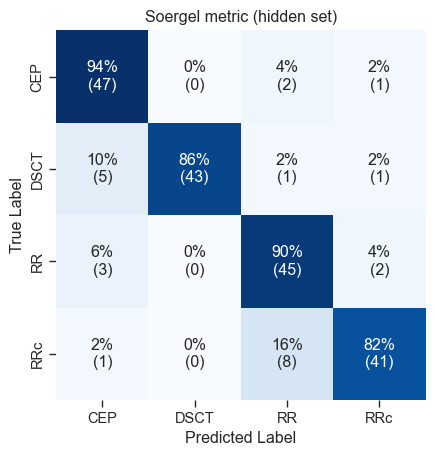

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


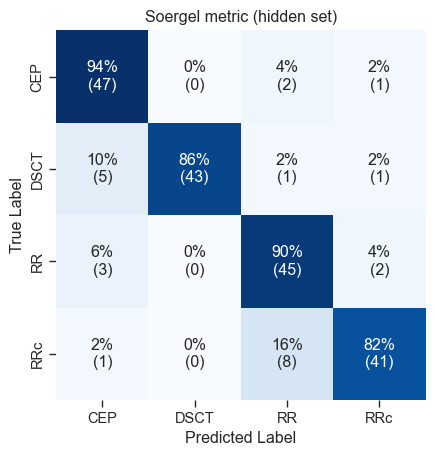

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


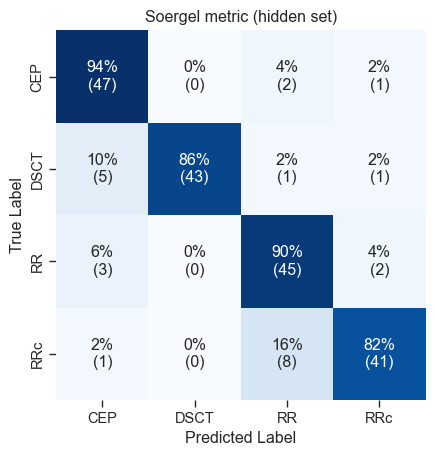

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


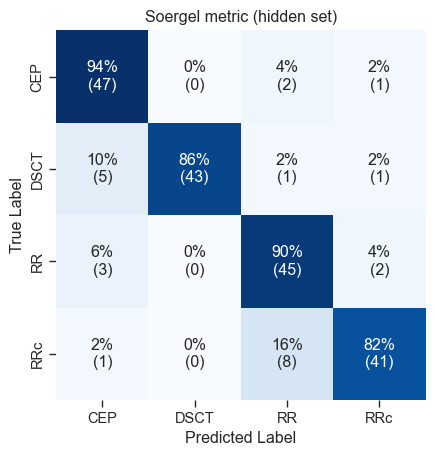

******************** Wave_Hedges ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


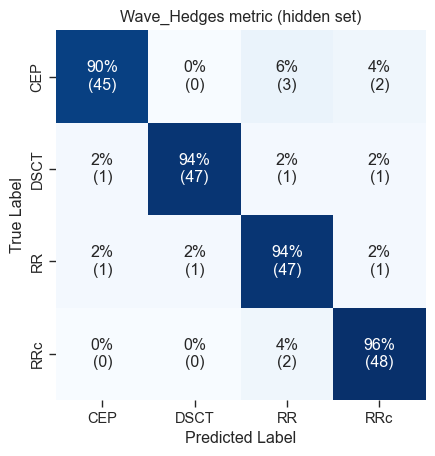

********** Run 2 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


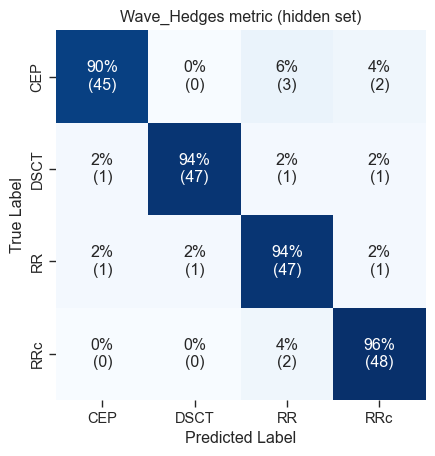

********** Run 3 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


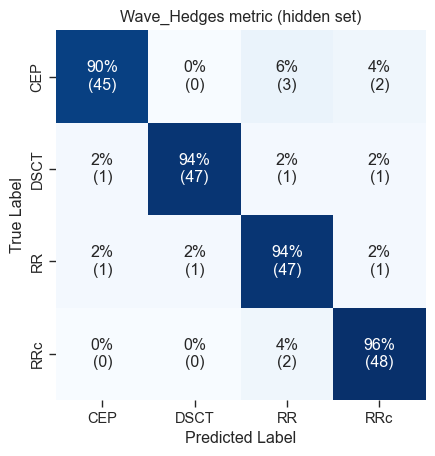

********** Run 4 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


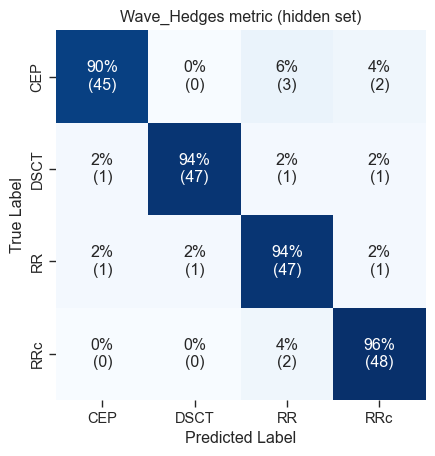

********** Run 5 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


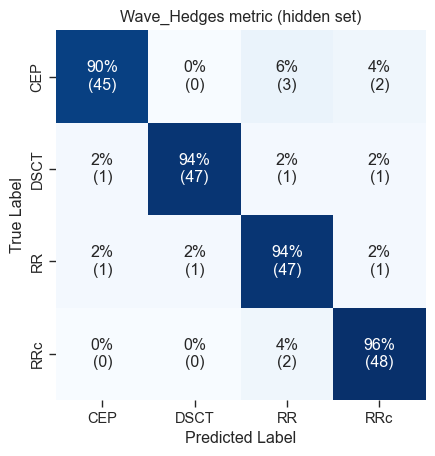

********** Run 6 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


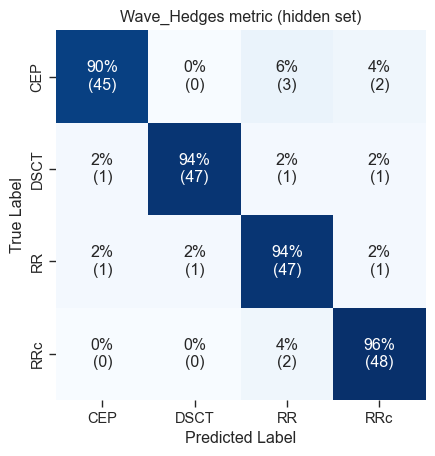

********** Run 7 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


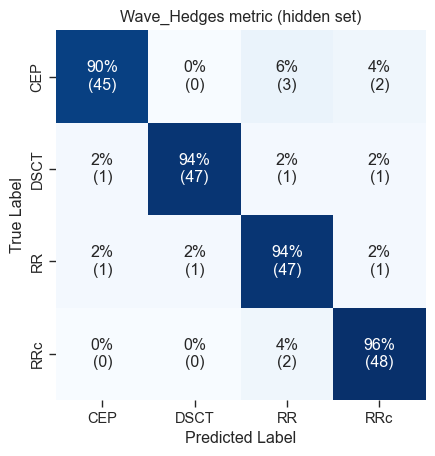

********** Run 8 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


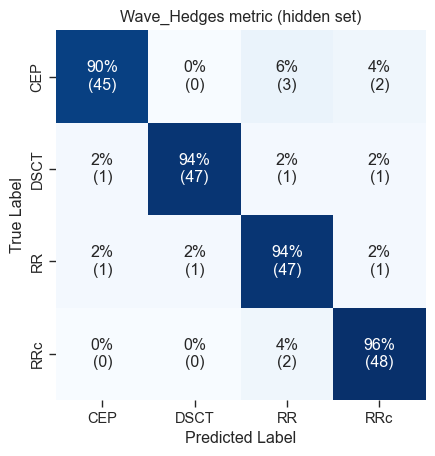

********** Run 9 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


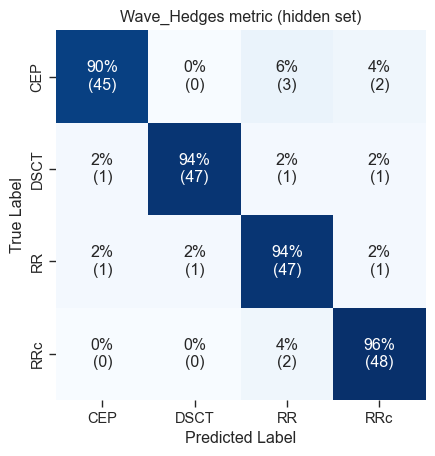

********** Run 10 **********
	Expected Score from training:
		F1 = 90.67 ± 0.72%
	Actual score on hidden set:
		F1 = 93.52 %


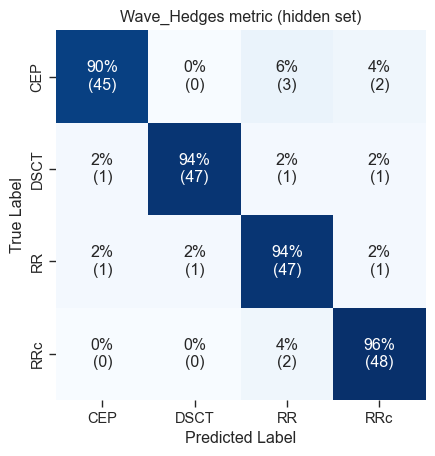

******************** Kulczynski ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


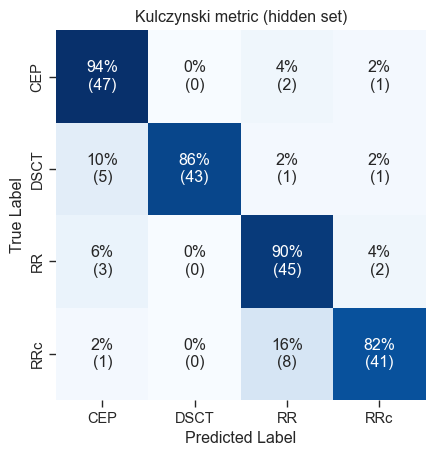

********** Run 2 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


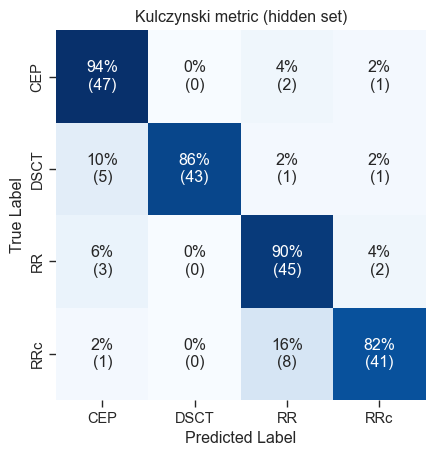

********** Run 3 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


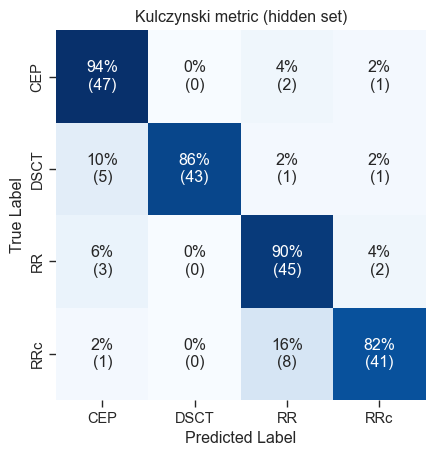

********** Run 4 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


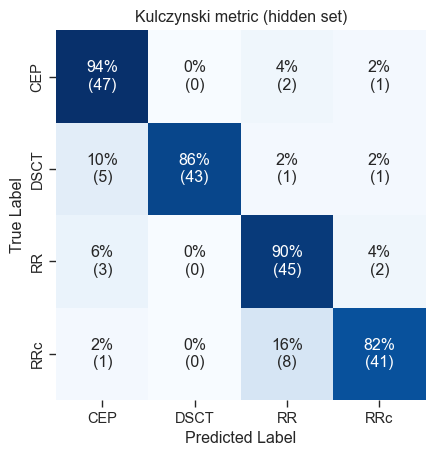

********** Run 5 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


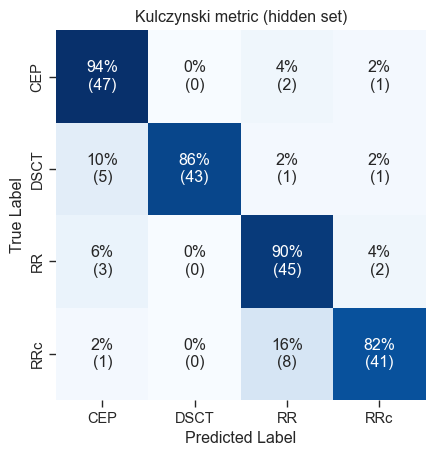

********** Run 6 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


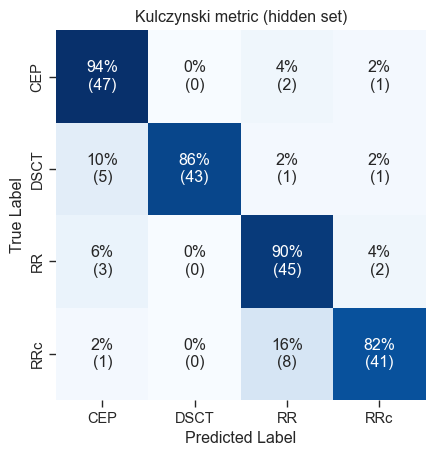

********** Run 7 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


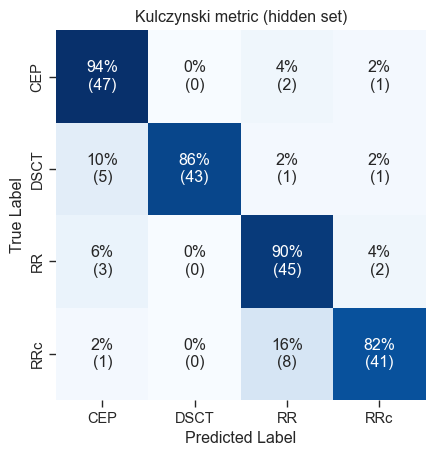

********** Run 8 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


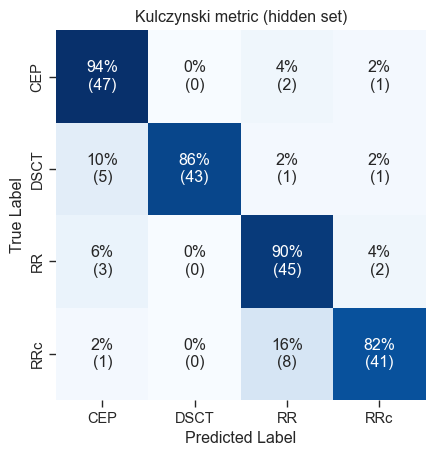

********** Run 9 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


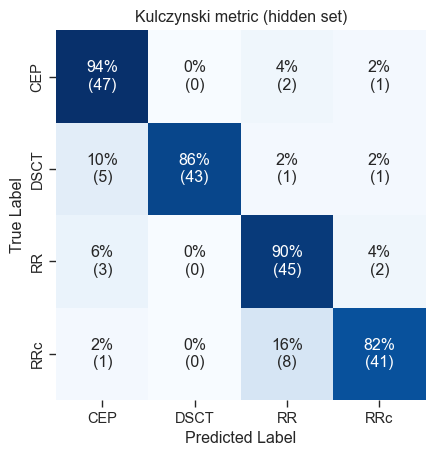

********** Run 10 **********
	Expected Score from training:
		F1 = 90.43 ± 0.95%
	Actual score on hidden set:
		F1 = 88.09 %


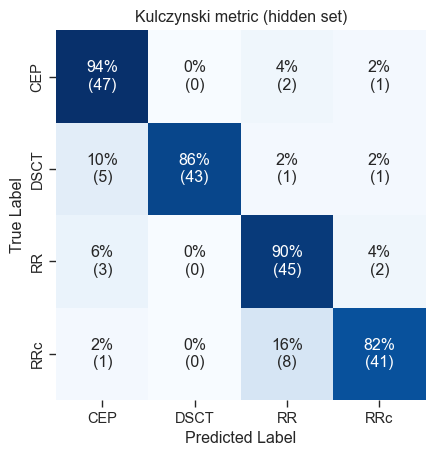

******************** Add_Chisq ********************


Run Number:   0%|          | 0/10 [00:00<?, ?it/s]

********** Run 1 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


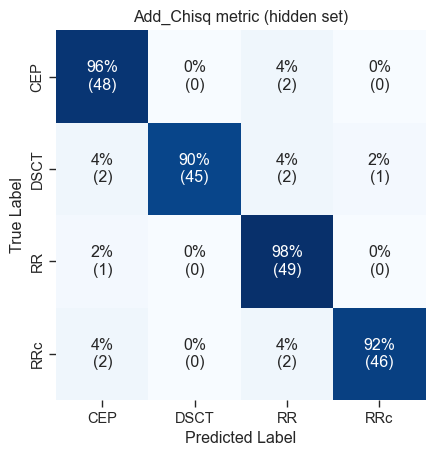

********** Run 2 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


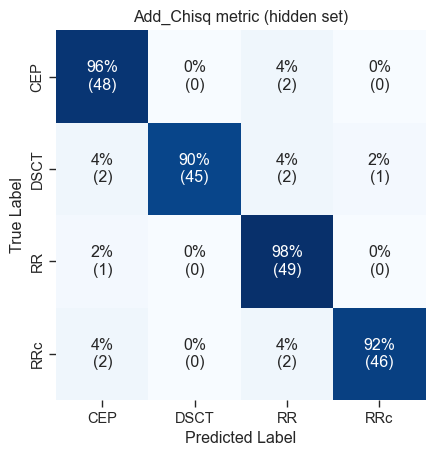

********** Run 3 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


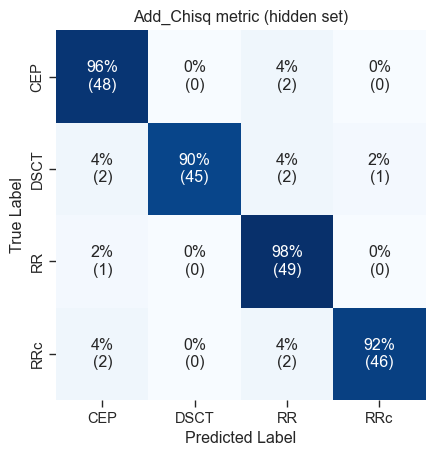

********** Run 4 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


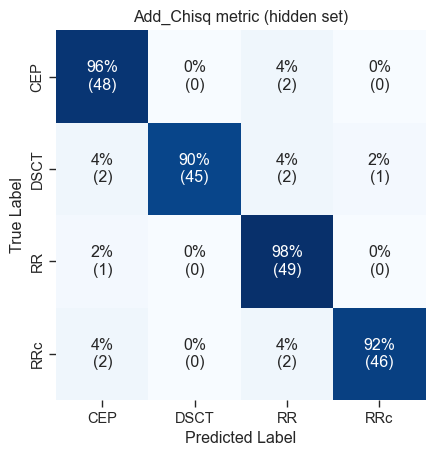

********** Run 5 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


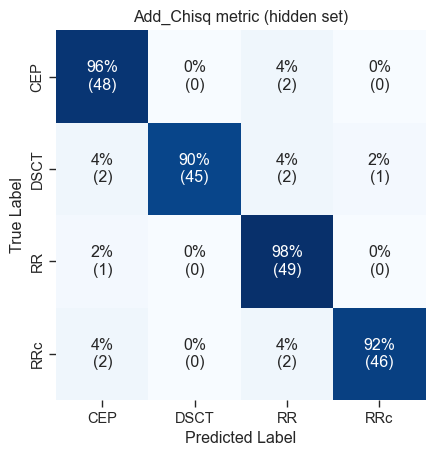

********** Run 6 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


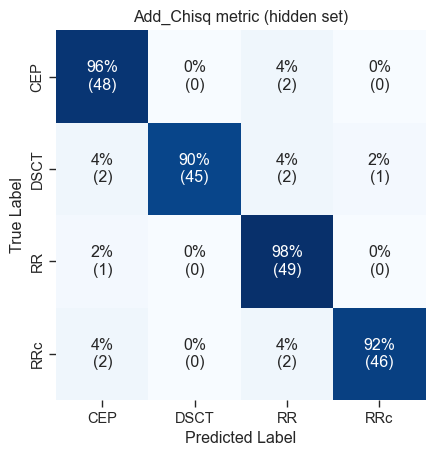

********** Run 7 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


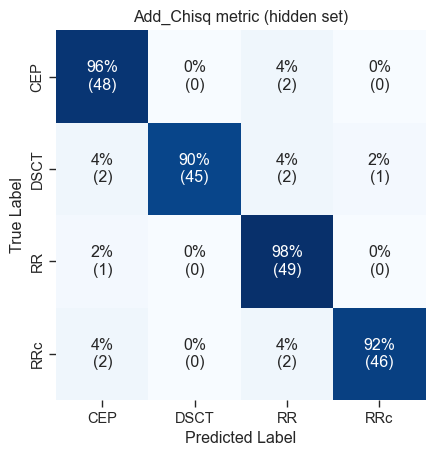

********** Run 8 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


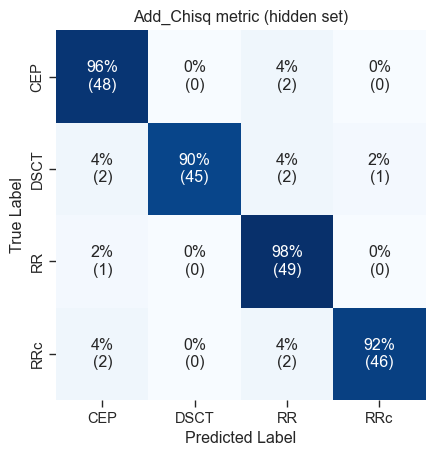

********** Run 9 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


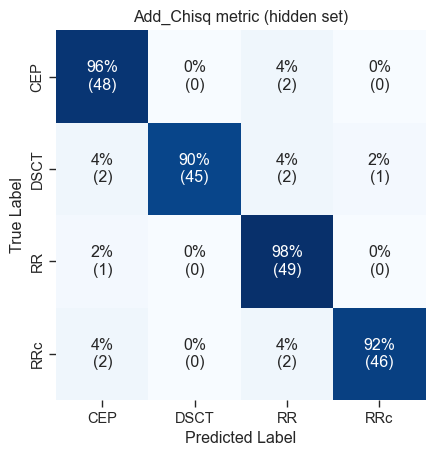

********** Run 10 **********
	Expected Score from training:
		F1 = 91.88 ± 0.80%
	Actual score on hidden set:
		F1 = 94.03 %


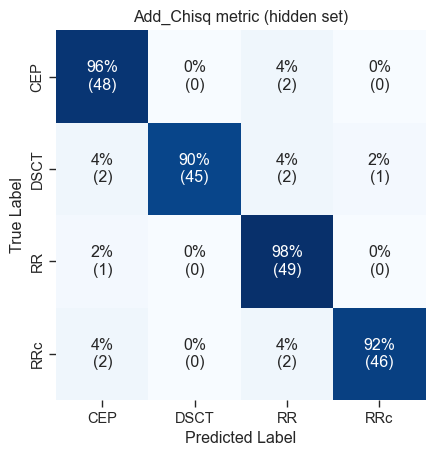

In [8]:
results_dict = {}
for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", results_subfolder, "distclassipy", metric_str)
    print("*" * 20, metric_str, "*" * 20)

    sfs_df = pd.read_csv(os.path.join(locpath, "sfs_allfeatures.csv"), index_col=0)
    feats_idx, feats = utils.load_best_features(sfs_df)

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale=True, 
        central_stat=settings_dict["central_stat"], 
        dispersion_stat=settings_dict["dispersion_stat"],
        calculate_kde=False, calculate_1d_dist=False
    )

    X_df = X_df_FULL.loc[y_df.index]

    X_df = X_df.loc[:, feats]

    X = X_df.to_numpy()
    y = y_df.to_numpy().ravel()

    lcdc.fit(X, y)

    HIDDENy_df = pd.read_csv("data/HIDDENy_df_multiclass.csv", index_col=0)
    HIDDENX_df = pd.read_csv("data/HIDDENX_df_multiclass.csv", index_col=0)

    HIDDENX_df = HIDDENX_df.loc[:, feats]
    HIDDENX_df = HIDDENX_df.dropna()
    HIDDENy_df = HIDDENy_df.loc[HIDDENX_df.index]

    # HIDDENX = HIDDENX_df.to_numpy()
    # HIDDENy = HIDDENy_df.to_numpy().ravel()

    results_dict[metric_str] = {}
    choose_objs = 50

    for run_num in tqdm(range(1, 11), desc="Run Number", leave=False):

        print("*" * 10, f"Run {run_num}", "*" * 10)

        #### NEW - choose 100 from each class
        cury_df = HIDDENy_df.groupby("class").sample(n=choose_objs, random_state=settings_dict["seed_choice"]).sample(frac=1, random_state=settings_dict["seed_choice"]) # Last sample for shuffling
        curX_df = HIDDENX_df.loc[cury_df.index]
        curX = curX_df.to_numpy()
        cury = cury_df.to_numpy().ravel()
        assert curX.shape[0]==cury.shape[0]
        
        results_dict[metric_str][run_num] = {}

        cury_pred = lcdc.predict_and_analyse(curX)
        
        acc = accuracy_score(y_true=cury, y_pred=cury_pred)
        f1score = f1_score(y_true=cury, y_pred=cury_pred, average="macro")
        matthew_coef = matthews_corrcoef(y_true=cury, y_pred=cury_pred)


        results_dict[metric_str][run_num]["acc"] = acc
        results_dict[metric_str][run_num]["f1score"] = f1score
        results_dict[metric_str][run_num]["matthew_coef"] = matthew_coef
        results_dict[metric_str][run_num]["features"] = feats
        results_dict[metric_str][run_num]["choose_objs"] = choose_objs

    
        print("\tExpected Score from training:")
        print(
            f"\t\tF1 = {sfs_df.loc[len(feats)]['avg_score']*100:.2f} ± {sfs_df.loc[len(feats)]['std_dev']*100:.2f}%"
        )
        print("\tActual score on hidden set:")
        # print(f"\tAcc = {100*acc:.2f} %")
        print(f"\t\tF1 = {100*f1score:.2f} %")
    
        ax = utils.plot_cm(y_true=cury, y_pred=cury_pred)
        plt.title(f"{metric_str.title()} metric (hidden set)")
        # plt.savefig(os.path.join(locpath, "hidden_cm.pdf"), bbox_inches="tight")
        # plt.savefig(f"hidden_cm/{metric_str}.pdf",bbox_inches = 'tight')
        plt.show()

In [9]:
# Flatten the dictionary
data = []
for method, values in results_dict.items():
    for key, val in values.items():
        val['metric'] = method
        val['run'] = key
        data.append(val)

# Convert to DataFrame
df = pd.DataFrame(data)
df = df.loc[:,['metric', 'run', 'f1score', 'acc', 'features', 'matthew_coef', 'choose_objs']]

In [10]:
print("Mean")
df.drop(["run"],axis=1).groupby("metric").mean(numeric_only=True)

Mean


f1score    acc  matthew_coef  choose_objs
metric                                                    
Add_Chisq       0.940299  0.940      0.921044         50.0
Braycurtis      0.880935  0.880      0.842051         50.0
Canberra        0.940509  0.940      0.920829         50.0
Chebyshev       0.813956  0.815      0.764526         50.0
Cityblock       0.884675  0.880      0.849193         50.0
Clark           0.930105  0.930      0.906939         50.0
Correlation     0.746985  0.750      0.679636         50.0
Cosine          0.755781  0.750      0.693692         50.0
Euclidean       0.818257  0.815      0.769055         50.0
Hellinger       0.935893  0.935      0.914340         50.0
Jaccard         0.950010  0.950      0.934362         50.0
Kulczynski      0.880935  0.880      0.842051         50.0
Lorentzian      0.894163  0.890      0.862026         50.0
Marylandbridge  0.667837  0.665      0.555878         50.0
Meehl           0.707490  0.700      0.626794         50.0
Motyka          0.880935  0.880      0.842051         50.0
Soergel         0.880935  0.880      0.842051         50.0
Wave_Hedges     0.935204  0.935      0.913729         50.0

In [11]:
print("Mean")
df.drop(["run"],axis=1).groupby("metric").mean(numeric_only=True)

Mean


f1score    acc  matthew_coef  choose_objs
metric                                                    
Add_Chisq       0.940299  0.940      0.921044         50.0
Braycurtis      0.880935  0.880      0.842051         50.0
Canberra        0.940509  0.940      0.920829         50.0
Chebyshev       0.813956  0.815      0.764526         50.0
Cityblock       0.884675  0.880      0.849193         50.0
Clark           0.930105  0.930      0.906939         50.0
Correlation     0.746985  0.750      0.679636         50.0
Cosine          0.755781  0.750      0.693692         50.0
Euclidean       0.818257  0.815      0.769055         50.0
Hellinger       0.935893  0.935      0.914340         50.0
Jaccard         0.950010  0.950      0.934362         50.0
Kulczynski      0.880935  0.880      0.842051         50.0
Lorentzian      0.894163  0.890      0.862026         50.0
Marylandbridge  0.667837  0.665      0.555878         50.0
Meehl           0.707490  0.700      0.626794         50.0
Motyka          0.880935  0.880      0.842051         50.0
Soergel         0.880935  0.880      0.842051         50.0
Wave_Hedges     0.935204  0.935      0.913729         50.0

In [12]:
print("Std deviation")
df.drop(["run"],axis=1).groupby("metric").std(numeric_only=True)

Std deviation


f1score  acc  matthew_coef  choose_objs
metric                                                 
Add_Chisq           0.0  0.0           0.0          0.0
Braycurtis          0.0  0.0           0.0          0.0
Canberra            0.0  0.0           0.0          0.0
Chebyshev           0.0  0.0           0.0          0.0
Cityblock           0.0  0.0           0.0          0.0
Clark               0.0  0.0           0.0          0.0
Correlation         0.0  0.0           0.0          0.0
Cosine              0.0  0.0           0.0          0.0
Euclidean           0.0  0.0           0.0          0.0
Hellinger           0.0  0.0           0.0          0.0
Jaccard             0.0  0.0           0.0          0.0
Kulczynski          0.0  0.0           0.0          0.0
Lorentzian          0.0  0.0           0.0          0.0
Marylandbridge      0.0  0.0           0.0          0.0
Meehl               0.0  0.0           0.0          0.0
Motyka              0.0  0.0           0.0          0.0
Soergel             0.0  0.0           0.0          0.0
Wave_Hedges         0.0  0.0           0.0          0.0

In [13]:
df.drop(["run"],axis=1).groupby("metric").describe().loc[:,[
    ('f1score', 'count'),
    ('f1score',  'mean'),
    ('f1score',   'std'),
    ('choose_objs', 'mean')
    
    # ('f1score',   'min'),
    # ('f1score',   '25%'),
    # ('f1score',   '50%'),
    # ('f1score',   '75%'),
    # ('f1score',   'max'),
    # ('selected_feats', 'count'),
    # ('selected_feats',  'mean'),
    # ('selected_feats',   'std'),
    # ('selected_feats',   'min'),
    # ('selected_feats',   '25%'),
    # ('selected_feats',   '50%'),
    # ('selected_feats',   '75%'),
    # ('selected_feats',   'max'),

]].round(3)

f1score             choose_objs
                 count   mean  std        mean
metric                                        
Add_Chisq         10.0  0.940  0.0        50.0
Braycurtis        10.0  0.881  0.0        50.0
Canberra          10.0  0.941  0.0        50.0
Chebyshev         10.0  0.814  0.0        50.0
Cityblock         10.0  0.885  0.0        50.0
Clark             10.0  0.930  0.0        50.0
Correlation       10.0  0.747  0.0        50.0
Cosine            10.0  0.756  0.0        50.0
Euclidean         10.0  0.818  0.0        50.0
Hellinger         10.0  0.936  0.0        50.0
Jaccard           10.0  0.950  0.0        50.0
Kulczynski        10.0  0.881  0.0        50.0
Lorentzian        10.0  0.894  0.0        50.0
Marylandbridge    10.0  0.668  0.0        50.0
Meehl             10.0  0.707  0.0        50.0
Motyka            10.0  0.881  0.0        50.0
Soergel           10.0  0.881  0.0        50.0
Wave_Hedges       10.0  0.935  0.0        50.0